Using matplotlib backend: TkAgg
1278


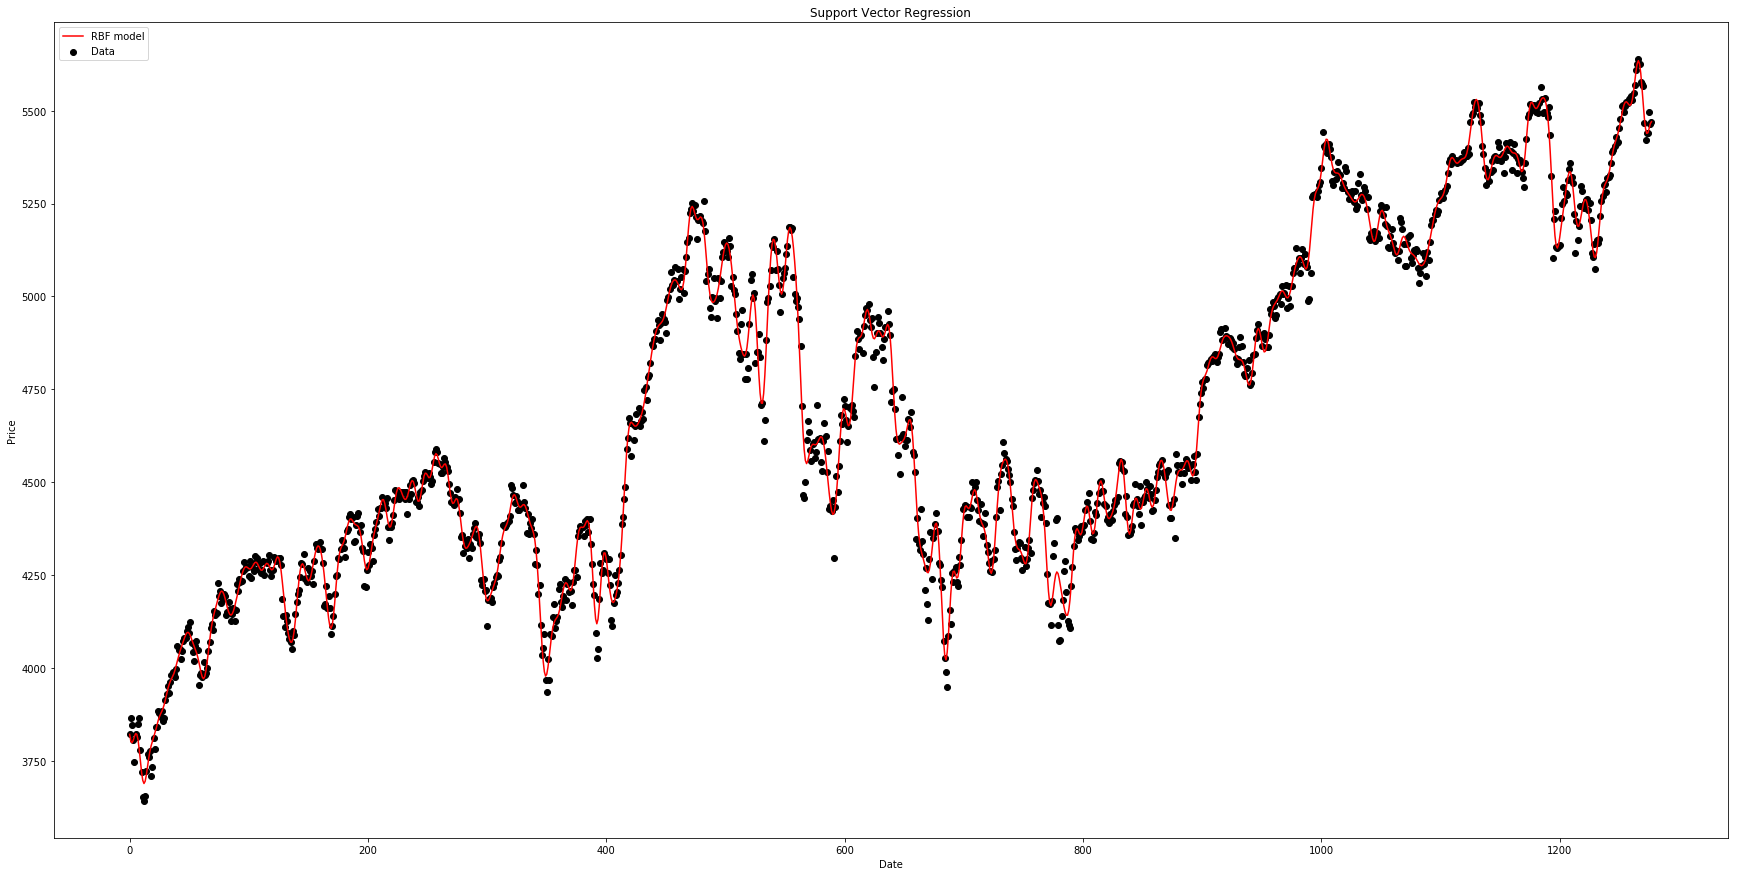

1278
5460.75196507237


In [43]:
# SVR
%matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (30.0, 15.0)

import csv
import numpy as np
from sklearn.svm import SVR


dates = []
real_dates = []
prices = []

i = 0

def read_data(filename):
    global i
    i = 0
    with open(filename, 'r') as csvFile:
        csvFileReader = csv.reader(csvFile)
        next(csvFileReader)
        for row in csvFileReader:
            real_dates.append(row[0])
            dates.append(i)
            prices.append(float(row[1]))
            i = i+1
        print(i)
    return

def price_prediction_model(dates, prices, x):
    dates = np.reshape(dates, (len(dates),1))
    svr_rbf = SVR(kernel='rbf',C=1e4, gamma = 0.01464)
        
    svr_rbf.fit(dates,prices)
    
    plt.scatter(dates, prices, color='black', label='Data')
    plt.plot(dates, svr_rbf.predict(dates), color='red', label='RBF model')
    
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.savefig('test.png', bbox_inches='tight')
    plt.show()
    return svr_rbf.predict(x)[0] 

read_data('CAC40_5Y.csv')

predicted_price = price_prediction_model(dates, prices, i)

print(i)
print(predicted_price)
#SVM not very good at price prediction with 1YR data set
#SVM not very good at price prediction with 5YR data set
# which is normal since SVM is not very good whith large data sets


In [1]:

"""
NEAT evloving a TraderGenome able to buy/sell/hodl fit for maximum returns
Strategy :  if output in :
                - ]-1, -0.33[ then sell
                - [-0.33, 0.33] then hodl
                - ]0.33, 1[ then buy
"""

from __future__ import print_function
import os
import neat
import visualize
import csv
import math
#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'


# custom gene with buy_count,sell_count and hodl_count
class TraderGenome(neat.DefaultGenome):
    def __init__(self, key):
        super().__init__(key)
        self.buy_count = 0
        self.sell_count = 0
        self.hodl_count = 0

    def configure_new(self, config):
        super().configure_new(config)
        self.buy_count = 0
        self.sell_count = 0
        self.hodl_count = 0

    def configure_crossover(self, genome1, genome2, config):
        super().configure_crossover(genome1, genome2, config)
        self.buy_count = 0
        self.sell_count = 0
        self.hodl_count = 0

    def mutate(self, config):
        super().mutate(config)
        self.buy_count = 0
        self.sell_count = 0
        self.hodl_count = 0

    def __str__(self):
        return "buy_count: {0}, sell_count: {1}, hodl_count: {2}\n{3}".format(self.buy_count,self.sell_count,self.hodl_count, super().__str__())



# Date, Open, High, Low, Close, Volume
# training data of CAC40 from 2005-06-13 till 2014-12-31
input_training_data = []

# training data of CAC40 from 2015-01-02 till 2018-06-11
input_testing_data = []

# 1 -> buy
# -1 -> sell
# 0 -> hodl
def decide(res):
    if (res > 0.33):
        return 1.0
    elif (res < -0.33):
        return -1.0
    else:
        return 0.0

def normalize_data(data_array):
    data_norm = []
    minx = min(data_array)
    maxx = max(data_array)
    for data in data_array:
        data_norm.append(2*((data-minx)/(maxx-minx))-1)
    return data_norm, minx, maxx

def load_data_from_csv(filename):
    data = []
    data_open = []
    data_high = []
    data_low = []
    data_close = []
    data_volume = []
    with open(filename, 'r') as File:  
        reader = csv.reader(File)
        for row in reader:
            data.append((round(float(row[1]),2),round(float(row[2]),2),round(float(row[3]),2),round(float(row[4]),2),round(float(row[5]),2)))
            data_open.append(round(float(row[1]),2))
            data_high.append(round(float(row[2]),2))
            data_low.append(round(float(row[3]),2))
            data_close.append(round(float(row[4]),2))
            data_volume.append(round(float(row[5]),2))
    return data, data_open,data_high,data_low,data_close,data_volume
            
    
def combine_arrays(arr1,arr2,arr3,arr4,arr5,):
    index = len(arr1)
    output = []
    for i in range(0,index):
        output.append((arr1[i],arr2[i],arr3[i],arr4[i],arr5[i]))
    return output


input_training_data,input_training_data_open,input_training_data_high,input_training_data_low,input_training_data_close,input_training_data_volume = load_data_from_csv('CAC40_2005_2017.csv')
input_testing_data,input_testing_data_open,input_testing_data_high,input_testing_data_low,input_testing_data_close,input_testing_data_volume = load_data_from_csv('CAC40_2017_2018.csv')


input_training_data_open_norm, input_training_data_open_minx, input_training_data_open_maxx = normalize_data(input_training_data_open)
input_training_data_high_norm, input_training_data_high_minx, input_training_data_high_maxx = normalize_data(input_training_data_high)
input_training_data_low_norm, input_training_data_low_minx, input_training_data_low_maxx = normalize_data(input_training_data_low)
input_training_data_close_norm, input_training_data_close_minx, input_training_data_close_maxx = normalize_data(input_training_data_close)
input_training_data_volume_norm, input_training_data_volume_minx, input_training_data_volume_maxx = normalize_data(input_training_data_volume)


input_testing_data_open_norm, input_testing_data_open_minx, input_testing_data_open_maxx = normalize_data(input_testing_data_open)
input_testing_data_high_norm, input_testing_data_high_minx, input_testing_data_high_maxx = normalize_data(input_testing_data_high)
input_testing_data_low_norm, input_testing_data_low_minx, input_testing_data_low_maxx = normalize_data(input_testing_data_low)
input_testing_data_close_norm, input_testing_data_close_minx, input_testing_data_close_maxx = normalize_data(input_testing_data_close)
input_testing_data_volume_norm, input_testing_data_volume_minx, input_testing_data_volume_maxx = normalize_data(input_testing_data_volume)


    
input_training_data_norm = combine_arrays(input_training_data_open_norm,
                                          input_training_data_high_norm,
                                          input_training_data_low_norm,
                                          input_training_data_close_norm,
                                          input_training_data_volume_norm)

input_testing_data_norm = combine_arrays(input_testing_data_open_norm,
                                          input_testing_data_high_norm,
                                          input_testing_data_low_norm,
                                          input_testing_data_close_norm,
                                          input_testing_data_volume_norm)


def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        money = 100000.0
        genome.fitness = 0
        shares = 0
        net = neat.nn.RecurrentNetwork.create(genome, config)
        size = len(input_training_data)
        genome.buy_count = 0
        genome.sell_count = 0
        genome.hodl_count = 0
        for i, input_data in enumerate(input_training_data_norm):
            if (i < size-1):
                #input_data = (input_data) + (shares,money,)
                output = net.activate(input_data)
                decision = decide(output[0]) #-1: sell | 0: HODL | 1: buy
                if (decision == -1 and shares > 0):
                    shares = shares-1
                    money = money + input_training_data[i+1][0] #Sell on market open
                    genome.sell_count = genome.sell_count+1
                
                elif (decision == 1 and money > input_training_data[i+1][0]):
                    shares = shares+1
                    money = money - input_training_data[i+1][0] #Buy on market open
                    genome.buy_count = genome.buy_count+1
                else: 
                    genome.hodl_count = genome.hodl_count+1
                    
        genome.fitness = ((money + shares*input_training_data[size-1][0]) - 100000.0)/1000.0 #returns in %
        if(genome.buy_count == 0 or genome.sell_count == 0):
            genome.fitness = genome.fitness - 20
        if(genome.hodl_count > genome.sell_count + genome.buy_count):
            op_sum = genome.sell_count + genome.buy_count
            penality = 80
            if (op_sum != 0):
                penality == 30*genome.hodl_count/(op_sum)

            genome.fitness -= math.floor(penality)


                
#EXECUSTION            
local_dir = os.getcwd()
config_path = os.path.join(local_dir, 'config-tradergenome')
# Load configuration.
config = neat.Config(TraderGenome, neat.DefaultReproduction,
                     neat.DefaultSpeciesSet, neat.DefaultStagnation,
                     config_path)

# Create the population, which is the top-level object for a NEAT run.
p = neat.Population(config)

# Add a stdout reporter to show progress in the terminal.
p.add_reporter(neat.StdOutReporter(True))
stats = neat.StatisticsReporter()
p.add_reporter(stats)
p.add_reporter(neat.Checkpointer(5))

# Run for up to X generations.
winner = p.run(eval_genomes, NONE)

# Display the winning genome.
print('\nBest genome:\n{!s}'.format(winner))

print('\nOutput:')
winner_net = neat.nn.RecurrentNetwork.create(winner, config)

node_names = {-1:'Open', -2: 'High',-3: 'Low',-4: 'Close',-5: 'Volume', 0:'Decide'}
visualize.draw_net(config, winner, True, node_names=node_names)
visualize.plot_stats(stats, ylog=False, view=True)
visualize.plot_species(stats, view=True)

"""
Testing best TraderGenome 2017-2018
"""

def test_best(input_test,input_test_norm):
    capital = 100000.0
    shares = 0
    size = len(input_test)
    buy_count = 0
    sell_count = 0
    hodl_count = 0
    for i, input_data in enumerate(input_test_norm):
        if (i < size-1):
                #input_data = (input_data) + (shares,capital,)
                output = winner_net.activate(input_data)
                decision = decide(output[0]) #-1: sell | 0: HODL | 1: buy
                if (decision == -1 and shares > 0):
                    shares = shares-1
                    capital = capital + input_test[i+1][0] #Sell on market open
                    sell_count = sell_count+1

                elif (decision == 1 and capital > input_test[i+1][0]):
                    shares = shares+1
                    capital = capital - input_test[i+1][0] #Buy on market open
                    buy_count = buy_count+1
                else: 
                    hodl_count = hodl_count+1
    print('Money: {!r}, Shares: {!r}\n'.format(capital,shares))
    print('buy_count: {!r}, sell_count: {!r}, hodl_count: {!r}\n'.format(buy_count,sell_count,hodl_count))        

print('2017-2018 test')
test_best(input_testing_data,input_testing_data_norm)
    
"""
Testing TraderGenome 2005-2018
"""

input_testing_data_norm_full = input_training_data_norm + input_testing_data_norm

input_testing_data_full = input_training_data + input_testing_data

print('2005-2018 test')
test_best(input_testing_data_full,input_testing_data_norm_full)




 ****** Running generation 0 ****** 

Population's average fitness: -55.00646 stdev: 42.07047
Best fitness: 71.24913 - size: (4, 22) - species 3 - id 119
Average adjusted fitness: 0.283
Mean genetic distance 3.371, standard deviation 0.383
Population of 300 members in 13 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   108     12.3    0.366     0
     2    0     3      2.7    0.166     0
     3    0    61     71.2    0.341     0
     4    0    14     70.5    0.404     0
     5    0    11    -57.1    0.242     0
     6    0    18     65.6    0.329     0
     7    0    51     17.6    0.285     0
     8    0     6    -76.0    0.232     0
     9    0    11     35.7    0.334     0
    10    0     3   -100.0    0.107     0
    11    0     6   -100.0    0.107     0
    12    0     2     14.4    0.663     0
    13    0     6   -100.0    0.107     0
Total extinctions: 0
Generation time: 14.892 sec

 ****** Running generation 1 ****** 



Population's average fitness: -21.58205 stdev: 55.56092
Best fitness: 119.07992 - size: (5, 22) - species 8 - id 350
Average adjusted fitness: 0.393
Mean genetic distance 2.910, standard deviation 0.588
Population of 302 members in 13 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    9    20     46.4    0.471     8
     2    9     9     -0.8    0.207     9
     3    9    13     60.3    0.338     7
     4    9    11     91.8    0.502     3
     5    9    27     86.7    0.419     6
     6    9    17     85.6    0.467     0
     7    9    18     65.1    0.354     7
     8    9    12    119.1    0.448     0
     9    9    94      3.9    0.434     2
    10    9    19     73.1    0.381     4
    11    9    23     89.8    0.379     1
    12    9    21     70.3    0.346     1
    13    9    18     82.1    0.368     0
Total extinctions: 0
Generation time: 14.445 sec (15.045 average)
Saving checkpoint to neat-checkpoint-9

 ****** Running gene

Population's average fitness: -11.54622 stdev: 58.65640
Best fitness: 119.07992 - size: (5, 22) - species 1 - id 350
Average adjusted fitness: 0.414
Mean genetic distance 2.899, standard deviation 0.598
Population of 298 members in 13 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   18     5    119.1    0.310    17
     2   18    94     66.6    0.453     1
     3   18    21    104.6    0.435    16
     4   18    21     91.8    0.448    12
     5   18    21     86.7    0.385    15
     6   18    20     92.5    0.545     5
     7   18     4    -76.0    0.139     7
     8   18    19     85.9    0.538     9
     9   18    19     76.9    0.409    11
    10   18    17    100.0    0.447     0
    11   18    21     89.8    0.347    10
    12   18    18     76.0    0.445     6
    13   18    18     89.3    0.484     7
Total extinctions: 0
Generation time: 16.328 sec (15.146 average)

 ****** Running generation 19 ****** 

Population's average

Population's average fitness: -11.92007 stdev: 58.65356
Best fitness: 119.07992 - size: (5, 22) - species 7 - id 350
Average adjusted fitness: 0.415
Mean genetic distance 2.939, standard deviation 0.588
Population of 297 members in 13 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   27     9     65.5    0.274    26
     2   27    23    104.4    0.444     8
     3   27    19    104.6    0.368    25
     4   27    21     91.8    0.484    21
     5   27    23     87.9    0.388     4
     6   27    25     92.5    0.549    14
     7   27   103    119.1    0.465    16
     8   27     3     88.6    0.507    18
     9   27     7    103.1    0.328    20
    10   27     2     62.0    0.316     9
    11   27    19     89.8    0.383    19
    12   27    16     76.0    0.359    15
    13   27    27     91.0    0.531     4
Total extinctions: 0
Generation time: 15.283 sec (15.149 average)

 ****** Running generation 28 ****** 

Population's average

Population's average fitness: -9.97112 stdev: 57.93529
Best fitness: 128.01616 - size: (7, 24) - species 9 - id 8800

Species 4 with 30 members is stagnated: removing it
Average adjusted fitness: 0.426
Mean genetic distance 2.839, standard deviation 0.702
Population of 301 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     2   36    23     92.6    0.406     1
     3   36    21    104.6    0.375    34
     5   36    27     87.9    0.469    13
     6   36    40     92.5    0.481    23
     7   36    18     93.1    0.504     5
     8   36    22     84.4    0.512    27
     9   36    45    128.0    0.414     3
    10   36    26     55.5    0.352    18
    11   36    24     89.8    0.364    28
    12   36    23     76.0    0.350    24
    13   36    32     94.4    0.460     1
Total extinctions: 0
Generation time: 17.960 sec (15.901 average)

 ****** Running generation 37 ****** 

Population's average fitness: -11.82902 stdev: 58.2

Population's average fitness: -14.10513 stdev: 53.07848
Best fitness: 128.01616 - size: (7, 24) - species 7 - id 8800
Average adjusted fitness: 0.399
Mean genetic distance 2.688, standard deviation 0.678
Population of 301 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     2   46    71    123.0    0.362    11
     5   46    45     87.9    0.355    23
     7   46    81    128.0    0.467    15
     9   46     2    111.5    0.382    13
    10   46    44     91.3    0.370    28
    13   46    58     95.7    0.456     2
Total extinctions: 0
Generation time: 17.270 sec (16.652 average)

 ****** Running generation 47 ****** 

Population's average fitness: -11.06568 stdev: 52.71253
Best fitness: 128.01616 - size: (7, 24) - species 7 - id 8800
Average adjusted fitness: 0.445
Mean genetic distance 2.630, standard deviation 0.711
Population of 299 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  

Population's average fitness: -17.38522 stdev: 54.85586
Best fitness: 128.01616 - size: (7, 24) - species 7 - id 8800
Average adjusted fitness: 0.402
Mean genetic distance 2.929, standard deviation 0.566
Population of 301 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     2   59    86     92.7    0.399    11
     5   59    58     66.0    0.369    10
     7   59    60    128.0    0.400    28
     9   59    32    123.3    0.418    26
    13   59    65     95.7    0.426    15
Total extinctions: 0
Generation time: 17.655 sec (15.961 average)
Saving checkpoint to neat-checkpoint-59

 ****** Running generation 60 ****** 

Population's average fitness: -14.54797 stdev: 55.24693
Best fitness: 128.01616 - size: (7, 24) - species 7 - id 8800
Average adjusted fitness: 0.380
Mean genetic distance 2.993, standard deviation 0.563
Population of 300 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  ==

Population's average fitness: 2.63240 stdev: 52.36129
Best fitness: 128.01616 - size: (7, 24) - species 14 - id 8800
Average adjusted fitness: 0.462
Mean genetic distance 3.001, standard deviation 0.525
Population of 300 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     2   73    62     85.6    0.524    25
     5   73   133    113.0    0.475    24
    13   73    42     83.6    0.439     9
    14   10    63    128.0    0.409     0
Total extinctions: 0
Generation time: 13.834 sec (16.622 average)

 ****** Running generation 74 ****** 

Population's average fitness: 1.78288 stdev: 53.13972
Best fitness: 128.01616 - size: (7, 24) - species 14 - id 8800
Average adjusted fitness: 0.428
Mean genetic distance 2.985, standard deviation 0.540
Population of 299 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     2   74    43     85.6    0.460    26
     5   74    25    113.0    

Population's average fitness: 9.58588 stdev: 54.20871
Best fitness: 128.01616 - size: (7, 24) - species 15 - id 8800
Average adjusted fitness: 0.492
Mean genetic distance 3.052, standard deviation 0.713
Population of 299 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    13   87    94     93.4    0.472    23
    14   24    69    117.9    0.416    14
    15    9    68    128.0    0.527     7
    16    9    68     91.2    0.553     0
Total extinctions: 0
Generation time: 16.514 sec (17.350 average)

 ****** Running generation 88 ****** 

Population's average fitness: 15.20431 stdev: 55.44670
Best fitness: 128.01616 - size: (7, 24) - species 15 - id 8800
Average adjusted fitness: 0.504
Mean genetic distance 3.093, standard deviation 0.639
Population of 300 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    13   88    71     93.4    0.520    24
    14   25    67    117.9   

Population's average fitness: 14.03175 stdev: 56.33044
Best fitness: 128.01616 - size: (7, 24) - species 15 - id 8800
Average adjusted fitness: 0.510
Mean genetic distance 3.084, standard deviation 0.647
Population of 300 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    13  101    70     94.6    0.437    37
    14   38    83    117.9    0.535    28
    15   23    68    128.0    0.514    21
    16   23    79     91.6    0.554     4
Total extinctions: 0
Generation time: 18.393 sec (18.108 average)

 ****** Running generation 102 ****** 

Population's average fitness: 13.09329 stdev: 55.45013
Best fitness: 128.01616 - size: (7, 24) - species 15 - id 8800
Average adjusted fitness: 0.522
Mean genetic distance 3.092, standard deviation 0.627
Population of 301 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    13  102    71     94.6    0.498    38
    14   39    82    117.9 


 ****** Running generation 115 ****** 

Population's average fitness: 11.81428 stdev: 55.71613
Best fitness: 128.01616 - size: (7, 24) - species 15 - id 8800
Average adjusted fitness: 0.502
Mean genetic distance 3.000, standard deviation 0.644
Population of 301 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    13  115    79     94.6    0.516    51
    14   52    68    117.9    0.403    42
    15   37    76    128.0    0.569    35
    16   37    78     91.6    0.519    18
Total extinctions: 0
Generation time: 24.669 sec (23.129 average)

 ****** Running generation 116 ****** 

Population's average fitness: 11.04640 stdev: 57.61441
Best fitness: 128.01616 - size: (7, 24) - species 15 - id 8800
Average adjusted fitness: 0.491
Mean genetic distance 3.027, standard deviation 0.636
Population of 301 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    13  116    78     94.6  

Population's average fitness: 20.13002 stdev: 54.46557
Best fitness: 128.65353 - size: (7, 24) - species 15 - id 33651
Average adjusted fitness: 0.526
Mean genetic distance 3.080, standard deviation 0.582
Population of 300 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    13  129    98     99.1    0.538    65
    14   66   108    117.9    0.508    56
    15   51    94    128.7    0.533    12
Total extinctions: 0
Generation time: 16.253 sec (19.765 average)
Saving checkpoint to neat-checkpoint-129

 ****** Running generation 130 ****** 

Population's average fitness: 16.67937 stdev: 54.61986
Best fitness: 128.65353 - size: (7, 24) - species 15 - id 33651
Average adjusted fitness: 0.514
Mean genetic distance 3.118, standard deviation 0.576
Population of 300 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    13  130    91     99.1    0.521    66
    14   67   103    117.9

Population's average fitness: 18.68233 stdev: 54.02751
Best fitness: 133.83587 - size: (18, 31) - species 13 - id 39632
Average adjusted fitness: 0.514
Mean genetic distance 3.010, standard deviation 0.639
Population of 301 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    13  144    92    133.8    0.535     6
    14   81   108    117.9    0.443    71
    15   66   101    128.7    0.563    27
Total extinctions: 0
Generation time: 16.071 sec (16.028 average)
Saving checkpoint to neat-checkpoint-144

 ****** Running generation 145 ****** 

Population's average fitness: 27.57522 stdev: 50.91307
Best fitness: 133.83587 - size: (18, 31) - species 13 - id 39632
Average adjusted fitness: 0.547
Mean genetic distance 3.024, standard deviation 0.619
Population of 300 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    13  145    86    133.8    0.535     7
    14   82   113    117

Population's average fitness: 12.40400 stdev: 56.27836
Best fitness: 155.98557 - size: (10, 20) - species 14 - id 45015
Average adjusted fitness: 0.424
Mean genetic distance 3.079, standard deviation 0.563
Population of 299 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    13  159   103    133.8    0.482    21
    14   96    76    156.0    0.315     3
    15   81   120    128.7    0.475    42
Total extinctions: 0
Generation time: 20.061 sec (16.415 average)
Saving checkpoint to neat-checkpoint-159

 ****** Running generation 160 ****** 

Population's average fitness: 17.78233 stdev: 60.75208
Best fitness: 155.98557 - size: (10, 20) - species 14 - id 45015
Average adjusted fitness: 0.448
Mean genetic distance 3.025, standard deviation 0.639
Population of 299 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    13  160   106    133.8    0.487    22
    14   97   131    156

Population's average fitness: 30.93189 stdev: 54.58631
Best fitness: 155.98557 - size: (10, 20) - species 14 - id 45015
Average adjusted fitness: 0.517
Mean genetic distance 3.190, standard deviation 0.588
Population of 300 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    13  174    78    133.8    0.522    36
    14  111    97    156.0    0.554    18
    15   96   125    128.7    0.474    57
Total extinctions: 0
Generation time: 17.414 sec (16.760 average)
Saving checkpoint to neat-checkpoint-174

 ****** Running generation 175 ****** 

Population's average fitness: 27.47026 stdev: 52.97835
Best fitness: 155.98557 - size: (10, 20) - species 14 - id 45015
Average adjusted fitness: 0.514
Mean genetic distance 3.182, standard deviation 0.593
Population of 299 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    13  175    74    133.8    0.507    37
    14  112   107    156

Population's average fitness: 27.14611 stdev: 56.53190
Best fitness: 155.98557 - size: (10, 20) - species 14 - id 45015
Average adjusted fitness: 0.522
Mean genetic distance 3.091, standard deviation 0.664
Population of 300 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    13  189    91    133.8    0.523    51
    14  126    69    156.0    0.562    33
    15  111   140    128.7    0.481    72
Total extinctions: 0
Generation time: 17.714 sec (18.882 average)
Saving checkpoint to neat-checkpoint-189

 ****** Running generation 190 ****** 

Population's average fitness: 21.62156 stdev: 56.88084
Best fitness: 155.98557 - size: (10, 20) - species 14 - id 45015
Average adjusted fitness: 0.489
Mean genetic distance 3.064, standard deviation 0.724
Population of 301 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    13  190    88    133.8    0.447    52
    14  127    72    156

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

2017-2018 test
Money: 27400.259999999984, Shares: 14

buy_count: 105, sell_count: 91, hodl_count: 56

2005-2018 test
Money: 28990.259999999947, Shares: 41

buy_count: 1120, sell_count: 1079, hodl_count: 1119



In [1]:


from __future__ import print_function
import os
import neat
import visualize
import csv
#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

local_dir = os.getcwd()
config_path = os.path.join(local_dir, 'config-tradergenome')
# Load configuration.
config = neat.Config(TraderGenome, neat.DefaultReproduction,
                     neat.DefaultSpeciesSet, neat.DefaultStagnation,
                     config_path)




p = neat.Checkpointer.restore_checkpoint('neat-checkpoint-673')
winner = p.run(eval_genomes, 100)

winner_net = neat.nn.RecurrentNetwork.create(winner, config)


"""
Testing best TraderGenome 2017-2018
"""

def test_best(input_test,input_test_norm):
    capital = 100000.0
    shares = 0
    size = len(input_test)
    buy_count = 0
    sell_count = 0
    hodl_count = 0
    for i, input_data in enumerate(input_test_norm):
        if (i < size-1):
                #input_data = (input_data) + (shares,capital,)
                output = winner_net.activate(input_data)
                decision = decide(output[0]) #-1: sell | 0: HODL | 1: buy
                string_dec = ''
                if (decision == -1 and shares > 0):
                    shares = shares-1
                    capital = capital + input_test[i+1][0] #Sell on market open
                    sell_count = sell_count+1
                    string_dec = 'Sell'

                elif (decision == 1 and capital > input_test[i+1][0]):
                    shares = shares+1
                    capital = capital - input_test[i+1][0] #Buy on market open
                    buy_count = buy_count+1
                    string_dec = 'Buy'
                else: 
                    hodl_count = hodl_count+1
                    string_dec = 'Hodl'
                
               # print('{!r}->{!s}: (Money: {!r}, Shares: {!r})'.format(i,string_dec,capital,shares))
    print('Money: {!r}, Shares: {!r}\n'.format(capital,shares))
    print('buy_count: {!r}, sell_count: {!r}, hodl_count: {!r}\n'.format(buy_count,sell_count,hodl_count))        


print('2017-2018 test')
test_best(input_testing_data,input_testing_data_norm)
    
"""
Testing TraderGenome 2005-2018
"""

input_testing_data_norm_full = input_training_data_norm + input_testing_data_norm

input_testing_data_full = input_training_data + input_testing_data

print('2005-2018 test')
test_best(input_testing_data_full,input_testing_data_norm_full)


NameError: name 'TraderGenome' is not defined

In [1]:

"""
NEAT evloving a TraderGenome able to buy/sell/hodl fit for maximum returns
Strategy :  -transform output from ]-1,1[ to ]-5,5[
            -compute the floor of the absolute value of the output and its sign
            -output > 0 then buy or sell (sign -1 sell, sign +1 buy)
            -output = 0 then hodl 
"""

from __future__ import print_function
import os
import neat
import visualize
import csv
import numpy as np
import math

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'


# custom gene with buy_count,sell_count and hodl_count
class TraderGenome(neat.DefaultGenome):
    def __init__(self, key):
        super().__init__(key)
        self.buy_count = 0
        self.sell_count = 0
        self.hodl_count = 0

    def configure_new(self, config):
        super().configure_new(config)
        self.buy_count = 0
        self.sell_count = 0
        self.hodl_count = 0

    def configure_crossover(self, genome1, genome2, config):
        super().configure_crossover(genome1, genome2, config)
        self.buy_count = 0
        self.sell_count = 0
        self.hodl_count = 0

    def mutate(self, config):
        super().mutate(config)
        self.buy_count = 0
        self.sell_count = 0
        self.hodl_count = 0

    def __str__(self):
        return "buy_count: {0}, sell_count: {1}, hodl_count: {2}\n{3}".format(self.buy_count,self.sell_count,self.hodl_count, super().__str__())



# Date, Open, High, Low, Close, Volume
# training data of CAC40 from 2005-06-13 till 2014-12-31
input_training_data = []

# training data of CAC40 from 2015-01-02 till 2018-06-11
input_testing_data = []    
    

def normalize_data(data_array):
    data_norm = []
    minx = min(data_array)
    maxx = max(data_array)
    for data in data_array:
        data_norm.append(2*((data-minx)/(maxx-minx))-1)
    return data_norm, minx, maxx

def load_data_from_csv(filename):
    data = []
    data_open = []
    data_high = []
    data_low = []
    data_close = []
    data_volume = []
    with open(filename, 'r') as File:  
        reader = csv.reader(File)
        for row in reader:
            data.append((round(float(row[1]),2),round(float(row[2]),2),round(float(row[3]),2),round(float(row[4]),2),round(float(row[5]),2)))
            data_open.append(round(float(row[1]),2))
            data_high.append(round(float(row[2]),2))
            data_low.append(round(float(row[3]),2))
            data_close.append(round(float(row[4]),2))
            data_volume.append(round(float(row[5]),2))
    return data, data_open,data_high,data_low,data_close,data_volume
            
    
def combine_arrays(arr1,arr2,arr3,arr4,arr5,):
    index = len(arr1)
    output = []
    for i in range(0,index):
        output.append((arr1[i],arr2[i],arr3[i],arr4[i],arr5[i]))
    return output


input_training_data,input_training_data_open,input_training_data_high,input_training_data_low,input_training_data_close,input_training_data_volume = load_data_from_csv('CAC40_2005_2014.csv')
input_testing_data,input_testing_data_open,input_testing_data_high,input_testing_data_low,input_testing_data_close,input_testing_data_volume = load_data_from_csv('CAC40_2015_2018.csv')


input_training_data_open_norm, input_training_data_open_minx, input_training_data_open_maxx = normalize_data(input_training_data_open)
input_training_data_high_norm, input_training_data_high_minx, input_training_data_high_maxx = normalize_data(input_training_data_high)
input_training_data_low_norm, input_training_data_low_minx, input_training_data_low_maxx = normalize_data(input_training_data_low)
input_training_data_close_norm, input_training_data_close_minx, input_training_data_close_maxx = normalize_data(input_training_data_close)
input_training_data_volume_norm, input_training_data_volume_minx, input_training_data_volume_maxx = normalize_data(input_training_data_volume)


input_testing_data_open_norm, input_testing_data_open_minx, input_testing_data_open_maxx = normalize_data(input_testing_data_open)
input_testing_data_high_norm, input_testing_data_high_minx, input_testing_data_high_maxx = normalize_data(input_testing_data_high)
input_testing_data_low_norm, input_testing_data_low_minx, input_testing_data_low_maxx = normalize_data(input_testing_data_low)
input_testing_data_close_norm, input_testing_data_close_minx, input_testing_data_close_maxx = normalize_data(input_testing_data_close)
input_testing_data_volume_norm, input_testing_data_volume_minx, input_testing_data_volume_maxx = normalize_data(input_testing_data_volume)


    
input_training_data_norm = combine_arrays(input_training_data_open_norm,
                                          input_training_data_high_norm,
                                          input_training_data_low_norm,
                                          input_training_data_close_norm,
                                          input_training_data_volume_norm)

input_testing_data_norm = combine_arrays(input_testing_data_open_norm,
                                          input_testing_data_high_norm,
                                          input_testing_data_low_norm,
                                          input_testing_data_close_norm,
                                          input_testing_data_volume_norm)


# firt output:
#    1 -> buy
#    -1 -> sell
#    0 -> hodl
# second output: share amount to buy/sell
def decide(res):
    res = np.arctanh(res) #denormalizing shares amount ???
    if(np.isinf(res) or np.isnan(res)):
        res = 0
    return np.sign(res), math.floor(abs(res))


def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        money = 100000.0
        genome.fitness = 0
        shares = 0
        net = neat.nn.RecurrentNetwork.create(genome, config)
        size = len(input_training_data)
        genome.buy_count = 0
        genome.sell_count = 0
        genome.hodl_count = 0
        for i, input_data in enumerate(input_training_data_norm):
            if (i < size-1):
                input_data = (input_data) + (np.tanh(shares),np.tanh(money),) #shares and capital normalized ???
                output = net.activate(input_data)
                decision, amount = decide(output[0]) #-1: sell | 0: HODL | 1: buy
                if (decision == -1 and shares >= amount and amount > 0):
                    shares = shares-amount
                    money = money + (amount*input_training_data[i+1][0]) #Sell on market open
                    genome.sell_count = genome.sell_count+1
                
                elif (decision == 1 and money >= (amount*input_training_data[i+1][0]) and amount > 0):
                    shares = shares+amount
                    money = money - (amount*input_training_data[i+1][0]) #Buy on market open
                    genome.buy_count = genome.buy_count+1
                else: 
                    genome.hodl_count = genome.hodl_count+1
                    
        genome.fitness = ((money + shares*input_training_data[-1][0]) - 100000.0)/1000.0 #returns in %
        penality = 2*genome.hodl_count
        if(genome.buy_count == 0 or genome.sell_count == 0):
            genome.fitness = genome.fitness - penality
        if(genome.hodl_count > genome.sell_count + genome.buy_count):
            op_sum = genome.sell_count + genome.buy_count
            if (op_sum != 0):
                penality == 30*genome.hodl_count/op_sum

            genome.fitness -= math.floor(penality)


                
#EXECUSTION            
local_dir = os.getcwd()
config_path = os.path.join(local_dir, 'config-tradergenome')
# Load configuration.
config = neat.Config(TraderGenome, neat.DefaultReproduction,
                     neat.DefaultSpeciesSet, neat.DefaultStagnation,
                     config_path)

# Create the population, which is the top-level object for a NEAT run.
p = neat.Population(config)

# Add a stdout reporter to show progress in the terminal.
p.add_reporter(neat.StdOutReporter(True))
stats = neat.StatisticsReporter()
p.add_reporter(stats)
p.add_reporter(neat.Checkpointer(10))

# Run for up to X generations.
winner = p.run(eval_genomes, 1)

# Display the winning genome.
print('\nBest genome:\n{!s}'.format(winner))

print('\nOutput:')
winner_net = neat.nn.RecurrentNetwork.create(winner, config)

node_names = {-1:'Open', -2: 'High',-3: 'Low',-4: 'Close',-5: 'Volume',-6: 'Shares',-7: 'Money', 0:'Decide'}
visualize.draw_net(config, winner, True, node_names=node_names)
visualize.plot_stats(stats, ylog=False, view=True)
visualize.plot_species(stats, view=True)

"""
Testing best TraderGenome 2017-2018
"""

def test_best(input_test,input_test_norm):
    capital = 100000.0
    shares = 0
    size = len(input_test)
    buy_count = 0
    sell_count = 0
    hodl_count = 0
    for i, input_data in enumerate(input_test_norm):
        if (i < size-1):
                input_data = (input_data) + (np.tanh(shares),np.tanh(capital),) #shares and capital normalized ???
                output = winner_net.activate(input_data)
                decision, amount = decide(output[0]) #-1: sell | 0: HODL | 1: buy
                if (decision == -1 and shares >= amount and amount > 0):
                    shares = shares-amount
                    capital = capital + (amount*input_test[i+1][0]) #Sell on market open
                    sell_count = sell_count+1

                elif (decision == 1 and capital >= (amount*input_test[i+1][0]) and amount > 0):
                    shares = shares+amount
                    capital = capital - (amount*input_test[i+1][0]) #Buy on market open
                    buy_count = buy_count+1
                else: 
                    hodl_count = hodl_count+1
    print('Money: {!r}, Shares: {!r}, Returns: {!r}%\n'.format(capital,shares, round(((capital+shares*input_test[-1][0])-100000.0)/1000.0,2)))
    print('buy_count: {!r}, sell_count: {!r}, hodl_count: {!r}\n'.format(buy_count,sell_count,hodl_count))        



"""
Testing TraderGenome 2005-2014
"""
print('2005-2014 test')
test_best(input_training_data,input_training_data_norm)


"""
Testing TraderGenome 2015-2018
"""
print('2015-2018 test')
test_best(input_testing_data,input_testing_data_norm)


"""
Testing TraderGenome 2005-2018
"""

input_testing_data_norm_full = input_training_data_norm + input_testing_data_norm

input_testing_data_full = input_training_data + input_testing_data

#print('2005-2018 test')
#test_best(input_testing_data_full,input_testing_data_norm_full)



 ****** Running generation 0 ****** 



c:\users\mbouqsimi\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:133: RuntimeWarning: divide by zero encountered in arctanh


Population's average fitness: -5074.30466 stdev: 2567.56480
Best fitness: 58.38538 - size: (15, 127) - species 1 - id 331
Average adjusted fitness: 0.469
Mean genetic distance 4.147, standard deviation 0.493
Population of 400 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   171     58.4    0.491     0
     2    0    51     49.6    0.431     0
     3    0    92     27.2    0.461     0
     4    0    86      9.5    0.493     0
Total extinctions: 0
Generation time: 53.548 sec

Best genome:
buy_count: 576, sell_count: 777, hodl_count: 1086
Key: 331
Fitness: 58.385380000000005
Nodes:
	0 DefaultNodeGene(key=0, bias=-0.5898299912916547, response=1.0, activation=tanh, aggregation=sum)
	4621 DefaultNodeGene(key=4621, bias=-0.10924001884806618, response=1.0, activation=tanh, aggregation=sum)
	4622 DefaultNodeGene(key=4622, bias=-0.12047107946584647, response=1.0, activation=tanh, aggregation=sum)
	4623 DefaultNodeGene(key=462

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

2005-2014 test
Money: 22187.93999999999, Shares: 32, Returns: 58.39%

buy_count: 576, sell_count: 777, hodl_count: 1086

2015-2018 test
Money: 2355.729999999956, Shares: 20, Returns: 11.55%

buy_count: 120, sell_count: 123, hodl_count: 632



In [ ]:
"""
Resuming after suspention
"""
from __future__ import print_function
import os
import neat
import visualize
import csv
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

local_dir = os.getcwd()
config_path = os.path.join(local_dir, 'config-tradergenome')
# Load configuration.
config = neat.Config(TraderGenome, neat.DefaultReproduction,
                     neat.DefaultSpeciesSet, neat.DefaultStagnation,
                     config_path)




p = neat.Checkpointer.restore_checkpoint('neat-checkpoint-13252')

# Add a stdout reporter to show progress in the terminal.
p.add_reporter(neat.StdOutReporter(True))
stats = neat.StatisticsReporter()
p.add_reporter(stats)
p.add_reporter(neat.Checkpointer(10))

winner = p.run(eval_genomes, None)

# Display the winning genome.
print('\nBest genome:\n{!s}'.format(winner))

print('\nOutput:')
winner_net = neat.nn.RecurrentNetwork.create(winner, config)

node_names = {-1:'Open', -2: 'High',-3: 'Low',-4: 'Close',-5: 'Volume',-6: 'Shares',-7: 'Money', 0:'Decide'}
visualize.draw_net(config, winner, True, node_names=node_names)
visualize.plot_stats(stats, ylog=False, view=True)
visualize.plot_species(stats, view=True)

"""
Testing TraderGenome 2005-2017
"""
print('2005-2017 test')
test_best(input_training_data,input_training_data_norm)


"""
Testing TraderGenome 2017-2018
"""
print('2017-2018 test')
test_best(input_testing_data,input_testing_data_norm)



 ****** Running generation 13252 ****** 



c:\users\mbouqsimi\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:133: RuntimeWarning: divide by zero encountered in arctanh


Population's average fitness: -2149.31343 stdev: 3877.42605
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.766
Mean genetic distance 2.859, standard deviation 0.628
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13252   159    172.9    0.805  2226
     3  13252   131    176.9    0.746  9817
     5  13252   110    162.8    0.746  3538
Total extinctions: 0
Generation time: 135.852 sec
Saving checkpoint to neat-checkpoint-13252

 ****** Running generation 13253 ****** 

Population's average fitness: -2134.47017 stdev: 3868.73923
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.770
Mean genetic distance 2.845, standard deviation 0.664
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13253   149    172.9    0.753  2227
     3  13253   

Population's average fitness: -2563.99927 stdev: 4131.49911
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.725
Mean genetic distance 2.840, standard deviation 0.682
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13266   156    172.9    0.735  2240
     3  13266   131    176.9    0.690  9831
     5  13266   113    162.8    0.750  3552
Total extinctions: 0
Generation time: 118.543 sec (139.317 average)
Saving checkpoint to neat-checkpoint-13266

 ****** Running generation 13267 ****** 

Population's average fitness: -2002.80813 stdev: 3810.10175
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.784
Mean genetic distance 2.850, standard deviation 0.708
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13267   155    172.9    0.744  224

Population's average fitness: -2131.30630 stdev: 3918.45503
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.770
Mean genetic distance 2.820, standard deviation 0.731
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13280   145    172.9    0.752  2254
     3  13280   127    176.9    0.735  9845
     5  13280   129    162.8    0.822  3566
Total extinctions: 0
Generation time: 119.682 sec (113.965 average)

 ****** Running generation 13281 ****** 

Population's average fitness: -1998.94810 stdev: 3628.31396
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.780
Mean genetic distance 2.815, standard deviation 0.678
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13281   153    172.9    0.792  2255
     3  13281   126    176.9    0.738  98

Population's average fitness: -1786.46715 stdev: 3608.99261
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.804
Mean genetic distance 2.853, standard deviation 0.668
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13294   143    172.9    0.729  2268
     3  13294   140    176.9    0.887  9859
     5  13294   117    162.8    0.797  3580
Total extinctions: 0
Generation time: 99.120 sec (99.025 average)

 ****** Running generation 13295 ****** 

Population's average fitness: -2176.47836 stdev: 3833.76740
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.766
Mean genetic distance 2.835, standard deviation 0.684
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13295   147    172.9    0.749  2269
     3  13295   134    176.9    0.736  9860

Population's average fitness: -2043.84215 stdev: 3695.26520
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.783
Mean genetic distance 2.847, standard deviation 0.669
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13308   150    172.9    0.759  2282
     3  13308   131    176.9    0.746  9873
     5  13308   119    162.8    0.844  3594
Total extinctions: 0
Generation time: 107.951 sec (103.946 average)

 ****** Running generation 13309 ****** 

Population's average fitness: -2297.30928 stdev: 3914.24030
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.755
Mean genetic distance 2.844, standard deviation 0.641
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13309   159    172.9    0.720  2283
     3  13309   128    176.9    0.707  98

Population's average fitness: -2299.62485 stdev: 3874.67020
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.750
Mean genetic distance 2.966, standard deviation 0.759
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13322   140    172.9    0.807  2296
     3  13322   133    176.9    0.738  9887
     5  13322   127    162.8    0.705  3608
Total extinctions: 0
Generation time: 82.428 sec (92.675 average)

 ****** Running generation 13323 ****** 

Population's average fitness: -1903.19661 stdev: 3732.25430
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.791
Mean genetic distance 2.976, standard deviation 0.785
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13323   142    172.9    0.771  2297
     3  13323   134    176.9    0.805  9888

Population's average fitness: -2561.88436 stdev: 3977.61790
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.723
Mean genetic distance 2.889, standard deviation 0.721
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13336   141    172.9    0.693  2310
     3  13336   130    176.9    0.714  9901
     5  13336   130    162.8    0.761  3622
Total extinctions: 0
Generation time: 87.842 sec (86.473 average)
Saving checkpoint to neat-checkpoint-13336

 ****** Running generation 13337 ****** 

Population's average fitness: -2252.63696 stdev: 3871.56789
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.756
Mean genetic distance 2.858, standard deviation 0.631
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13337   145    172.9    0.736  2311


Population's average fitness: -2203.52700 stdev: 3833.73408
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.760
Mean genetic distance 2.902, standard deviation 0.733
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13350   146    172.9    0.742  2324
     3  13350   131    176.9    0.744  9915
     5  13350   123    162.8    0.794  3636
Total extinctions: 0
Generation time: 69.738 sec (80.164 average)

 ****** Running generation 13351 ****** 

Population's average fitness: -2608.99225 stdev: 4138.60862
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.718
Mean genetic distance 2.871, standard deviation 0.637
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13351   143    172.9    0.740  2325
     3  13351   135    176.9    0.743  9916

Population's average fitness: -2357.77851 stdev: 3947.24501
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.747
Mean genetic distance 2.918, standard deviation 0.743
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13364   147    172.9    0.721  2338
     3  13364   134    176.9    0.769  9929
     5  13364   120    162.8    0.750  3650
Total extinctions: 0
Generation time: 89.145 sec (82.258 average)
Saving checkpoint to neat-checkpoint-13364

 ****** Running generation 13365 ****** 

Population's average fitness: -2017.04372 stdev: 3678.09377
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.779
Mean genetic distance 2.933, standard deviation 0.751
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13365   138    172.9    0.789  2339


Population's average fitness: -2147.81168 stdev: 3854.69346
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.766
Mean genetic distance 2.899, standard deviation 0.698
Population of 399 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13378   134    172.9    0.746  2352
     3  13378   132    176.9    0.780  9943
     5  13378   133    162.8    0.772  3664
Total extinctions: 0
Generation time: 99.289 sec (95.975 average)

 ****** Running generation 13379 ****** 

Population's average fitness: -2137.06639 stdev: 3852.77916
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.767
Mean genetic distance 2.897, standard deviation 0.713
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13379   130    172.9    0.800  2353
     3  13379   128    176.9    0.710  9944


 ****** Running generation 13392 ****** 

Population's average fitness: -1960.70712 stdev: 3799.41864
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.783
Mean genetic distance 2.832, standard deviation 0.688
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13392   160    172.9    0.820  2366
     3  13392   124    176.9    0.737  9957
     5  13392   116    162.8    0.790  3678
Total extinctions: 0
Generation time: 82.134 sec (82.375 average)

 ****** Running generation 13393 ****** 

Population's average fitness: -2100.30688 stdev: 3867.50019
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.774
Mean genetic distance 2.826, standard deviation 0.725
Population of 399 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13393   155    172.9    0.748  2367


Population's average fitness: -2496.11173 stdev: 4086.87521
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.728
Mean genetic distance 2.866, standard deviation 0.672
Population of 399 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13406   159    172.9    0.787  2380
     3  13406   123    176.9    0.692  9971
     5  13406   117    162.8    0.707  3692
Total extinctions: 0
Generation time: 75.884 sec (85.466 average)

 ****** Running generation 13407 ****** 

Population's average fitness: -2630.95952 stdev: 4129.36943
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.722
Mean genetic distance 2.845, standard deviation 0.662
Population of 399 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13407   158    172.9    0.680  2381
     3  13407   121    176.9    0.685  9972

Population's average fitness: -2263.71481 stdev: 3907.46443
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.755
Mean genetic distance 2.840, standard deviation 0.668
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13420   165    172.9    0.753  2394
     3  13420   125    176.9    0.724  9985
     5  13420   110    162.8    0.788  3706
Total extinctions: 0
Generation time: 63.942 sec (72.497 average)

 ****** Running generation 13421 ****** 

Population's average fitness: -2641.77312 stdev: 4176.53148
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.721
Mean genetic distance 2.828, standard deviation 0.651
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13421   159    172.9    0.698  2395
     3  13421   124    176.9    0.679  9986

Population's average fitness: -2139.28619 stdev: 3783.84841
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.767
Mean genetic distance 2.900, standard deviation 0.751
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13434   142    172.9    0.734  2408
     3  13434   126    176.9    0.766  9999
     5  13434   133    162.8    0.802  3720
Total extinctions: 0
Generation time: 59.872 sec (65.977 average)

 ****** Running generation 13435 ****** 

Population's average fitness: -2041.87900 stdev: 3754.96483
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.775
Mean genetic distance 2.913, standard deviation 0.768
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13435   147    172.9    0.769  2409
     3  13435   123    176.9    0.698  1000

Mean genetic distance 2.874, standard deviation 0.785
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13448   131    172.9    0.689  2422
     3  13448   135    176.9    0.777  10013
     5  13448   134    162.8    0.783  3734
Total extinctions: 0
Generation time: 55.388 sec (61.022 average)

 ****** Running generation 13449 ****** 

Population's average fitness: -2187.08128 stdev: 3920.55010
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.762
Mean genetic distance 2.882, standard deviation 0.778
Population of 399 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13449   129    172.9    0.746  2423
     3  13449   132    176.9    0.735  10014
     5  13449   138    162.8    0.805  3735
Total extinctions: 0
Generation time: 49.309 sec (60.158 average)
Saving checkpoint to neat-checkpoint-13449

 


 ****** Running generation 13463 ****** 

Population's average fitness: -2407.39840 stdev: 3966.03284
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.740
Mean genetic distance 2.939, standard deviation 0.756
Population of 399 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13463   131    172.9    0.757  2437
     3  13463   132    176.9    0.726  10028
     5  13463   136    162.8    0.736  3749
Total extinctions: 0
Generation time: 48.525 sec (48.577 average)

 ****** Running generation 13464 ****** 

Population's average fitness: -2766.88254 stdev: 4198.29622
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.704
Mean genetic distance 2.910, standard deviation 0.719
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13464   131    172.9    0.652  2438

Population's average fitness: -2117.11740 stdev: 3742.00394
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.767
Mean genetic distance 2.743, standard deviation 0.548
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13477   129    172.9    0.742  2451
     3  13477   127    176.9    0.731  10042
     5  13477   144    162.8    0.828  3763
Total extinctions: 0
Generation time: 49.767 sec (49.101 average)

 ****** Running generation 13478 ****** 

Population's average fitness: -1850.68866 stdev: 3677.48477
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.792
Mean genetic distance 2.743, standard deviation 0.575
Population of 399 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13478   132    172.9    0.760  2452
     3  13478   125    176.9    0.735  100

Mean genetic distance 2.751, standard deviation 0.616
Population of 399 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13491   152    172.9    0.793  2465
     3  13491   131    176.9    0.760  10056
     5  13491   116    162.8    0.756  3777
Total extinctions: 0
Generation time: 39.471 sec (47.231 average)

 ****** Running generation 13492 ****** 

Population's average fitness: -1791.50615 stdev: 3631.12083
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.803
Mean genetic distance 2.759, standard deviation 0.662
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13492   157    172.9    0.792  2466
     3  13492   132    176.9    0.797  10057
     5  13492   111    162.8    0.821  3778
Total extinctions: 0
Generation time: 36.823 sec (46.053 average)

 ****** Running generation 13493 ****** 

Po

Population's average fitness: -2115.62351 stdev: 3860.09820
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.769
Mean genetic distance 2.781, standard deviation 0.689
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13506   127    172.9    0.793  2480
     3  13506   133    176.9    0.746  10071
     5  13506   140    162.8    0.768  3792
Total extinctions: 0
Generation time: 26.980 sec (30.940 average)

 ****** Running generation 13507 ****** 

Population's average fitness: -1922.73097 stdev: 3575.69104
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.788
Mean genetic distance 2.764, standard deviation 0.676
Population of 399 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13507   129    172.9    0.771  2481
     3  13507   131    176.9    0.765  100

Mean genetic distance 2.849, standard deviation 0.760
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13520   134    172.9    0.792  2494
     3  13520   125    176.9    0.699  10085
     5  13520   141    162.8    0.825  3806
Total extinctions: 0
Generation time: 28.598 sec (27.368 average)

 ****** Running generation 13521 ****** 

Population's average fitness: -2171.65596 stdev: 3884.24386
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.761
Mean genetic distance 2.859, standard deviation 0.756
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13521   137    172.9    0.793  2495
     3  13521   122    176.9    0.678  10086
     5  13521   141    162.8    0.812  3807
Total extinctions: 0
Generation time: 29.956 sec (27.555 average)

 ****** Running generation 13522 ****** 

Po

Population's average fitness: -1878.63693 stdev: 3628.26411
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.792
Mean genetic distance 2.838, standard deviation 0.758
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13535   137    172.9    0.794  2509
     3  13535   128    176.9    0.753  10100
     5  13535   135    162.8    0.830  3821
Total extinctions: 0
Generation time: 41.436 sec (40.481 average)

 ****** Running generation 13536 ****** 

Population's average fitness: -1916.58671 stdev: 3604.98964
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.789
Mean genetic distance 2.825, standard deviation 0.708
Population of 399 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13536   142    172.9    0.777  2510
     3  13536   127    176.9    0.755  101

Mean genetic distance 2.821, standard deviation 0.699
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13549   140    172.9    0.733  2523
     3  13549   131    176.9    0.740  10114
     5  13549   129    162.8    0.794  3835
Total extinctions: 0
Generation time: 56.985 sec (56.434 average)
Saving checkpoint to neat-checkpoint-13549

 ****** Running generation 13550 ****** 

Population's average fitness: -2353.35662 stdev: 4011.81406
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.747
Mean genetic distance 2.834, standard deviation 0.702
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13550   133    172.9    0.676  2524
     3  13550   134    176.9    0.766  10115
     5  13550   133    162.8    0.799  3836
Total extinctions: 0
Generation time: 59.119 sec (57.045 average)

 

Mean genetic distance 2.813, standard deviation 0.693
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13563   156    172.9    0.722  2537
     3  13563   131    176.9    0.769  10128
     5  13563   113    162.8    0.820  3849
Total extinctions: 0
Generation time: 52.010 sec (56.378 average)

 ****** Running generation 13564 ****** 

Population's average fitness: -2315.11958 stdev: 3900.90476
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.751
Mean genetic distance 2.808, standard deviation 0.675
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13564   149    172.9    0.724  2538
     3  13564   135    176.9    0.781  10129
     5  13564   116    162.8    0.747  3850
Total extinctions: 0
Generation time: 56.931 sec (56.253 average)

 ****** Running generation 13565 ****** 

Po


 ****** Running generation 13578 ****** 

Population's average fitness: -2449.11930 stdev: 4038.31438
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.735
Mean genetic distance 2.782, standard deviation 0.620
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13578   145    172.9    0.752  2552
     3  13578   127    176.9    0.707  10143
     5  13578   129    162.8    0.745  3864
Total extinctions: 0
Generation time: 73.580 sec (66.321 average)

 ****** Running generation 13579 ****** 

Population's average fitness: -2511.89877 stdev: 4061.00150
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.728
Mean genetic distance 2.795, standard deviation 0.661
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13579   143    172.9    0.754  2553

Population's average fitness: -2489.87734 stdev: 3959.00031
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.731
Mean genetic distance 2.841, standard deviation 0.699
Population of 399 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13592   130    172.9    0.734  2566
     3  13592   135    176.9    0.738  10157
     5  13592   134    162.8    0.722  3878
Total extinctions: 0
Generation time: 95.754 sec (86.833 average)

 ****** Running generation 13593 ****** 

Population's average fitness: -2140.61749 stdev: 3921.11732
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.766
Mean genetic distance 2.856, standard deviation 0.752
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13593   125    172.9    0.691  2567
     3  13593   138    176.9    0.806  101


 ****** Running generation 13606 ****** 

Population's average fitness: -2289.45431 stdev: 3926.45571
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.752
Mean genetic distance 2.901, standard deviation 0.721
Population of 399 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13606   140    172.9    0.766  2580
     3  13606   129    176.9    0.701  10171
     5  13606   130    162.8    0.789  3892
Total extinctions: 0
Generation time: 70.681 sec (86.272 average)

 ****** Running generation 13607 ****** 

Population's average fitness: -2227.85202 stdev: 3863.76508
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.758
Mean genetic distance 2.929, standard deviation 0.728
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13607   135    172.9    0.742  2581

Population's average fitness: -1832.13895 stdev: 3624.56891
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.798
Mean genetic distance 2.913, standard deviation 0.759
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13620   140    172.9    0.754  2594
     3  13620   137    176.9    0.838  10185
     5  13620   123    162.8    0.802  3906
Total extinctions: 0
Generation time: 57.537 sec (58.486 average)

 ****** Running generation 13621 ****** 

Population's average fitness: -2279.82333 stdev: 3872.61224
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.756
Mean genetic distance 2.930, standard deviation 0.766
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13621   133    172.9    0.633  2595
     3  13621   141    176.9    0.823  101

Mean genetic distance 2.952, standard deviation 0.765
Population of 399 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13634   137    172.9    0.717  2608
     3  13634   135    176.9    0.778  10199
     5  13634   127    162.8    0.765  3920
Total extinctions: 0
Generation time: 33.065 sec (41.751 average)

 ****** Running generation 13635 ****** 

Population's average fitness: -2176.25073 stdev: 3853.17387
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.763
Mean genetic distance 2.975, standard deviation 0.755
Population of 399 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13635   138    172.9    0.774  2609
     3  13635   134    176.9    0.760  10200
     5  13635   127    162.8    0.755  3921
Total extinctions: 0
Generation time: 29.653 sec (39.377 average)

 ****** Running generation 13636 ****** 

Po


 ****** Running generation 13649 ****** 

Population's average fitness: -2233.49173 stdev: 3865.89000
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.758
Mean genetic distance 2.836, standard deviation 0.732
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13649   145    172.9    0.738  2623
     3  13649   137    176.9    0.756  10214
     5  13649   119    162.8    0.781  3935
Total extinctions: 0
Generation time: 26.772 sec (30.746 average)

 ****** Running generation 13650 ****** 

Population's average fitness: -2177.46443 stdev: 3834.77909
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.768
Mean genetic distance 2.829, standard deviation 0.705
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13650   135    172.9    0.690  2624

Mean genetic distance 2.776, standard deviation 0.684
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13663   147    172.9    0.806  2637
     3  13663   127    176.9    0.743  10228
     5  13663   127    162.8    0.804  3949
Total extinctions: 0
Generation time: 21.089 sec (22.024 average)

 ****** Running generation 13664 ****** 

Population's average fitness: -2379.87889 stdev: 3987.45322
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.743
Mean genetic distance 2.793, standard deviation 0.695
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13664   144    172.9    0.742  2638
     3  13664   126    176.9    0.697  10229
     5  13664   130    162.8    0.789  3950
Total extinctions: 0
Generation time: 20.988 sec (21.704 average)

 ****** Running generation 13665 ****** 

Po

Population's average fitness: -2411.71351 stdev: 3982.74328
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.739
Mean genetic distance 2.841, standard deviation 0.670
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13678   140    172.9    0.639  2652
     3  13678   135    176.9    0.768  10243
     5  13678   125    162.8    0.810  3964
Total extinctions: 0
Generation time: 20.215 sec (20.197 average)
Saving checkpoint to neat-checkpoint-13678

 ****** Running generation 13679 ****** 

Population's average fitness: -2594.92248 stdev: 4068.78945
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.721
Mean genetic distance 2.852, standard deviation 0.712
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13679   145    172.9    0.726  2653

Mean genetic distance 2.830, standard deviation 0.654
Population of 399 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13692   139    172.9    0.750  2666
     3  13692   130    176.9    0.775  10257
     5  13692   130    162.8    0.819  3978
Total extinctions: 0
Generation time: 22.718 sec (21.839 average)

 ****** Running generation 13693 ****** 

Population's average fitness: -2437.17217 stdev: 3998.85855
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.738
Mean genetic distance 2.832, standard deviation 0.723
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13693   155    172.9    0.694  2667
     3  13693   130    176.9    0.719  10258
     5  13693   116    162.8    0.801  3979
Total extinctions: 0
Generation time: 22.963 sec (22.014 average)

 ****** Running generation 13694 ****** 

Po

Population's average fitness: -2280.49835 stdev: 3869.90678
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.753
Mean genetic distance 2.822, standard deviation 0.697
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13707   123    172.9    0.746  2681
     3  13707   126    176.9    0.686  10272
     5  13707   151    162.8    0.826  3993
Total extinctions: 0
Generation time: 21.854 sec (23.959 average)

 ****** Running generation 13708 ****** 

Population's average fitness: -2228.61763 stdev: 3880.11209
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.755
Mean genetic distance 2.777, standard deviation 0.632
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13708   146    172.9    0.828  2682
     3  13708   118    176.9    0.623  102

Mean genetic distance 2.802, standard deviation 0.610
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13721   142    172.9    0.767  2695
     3  13721   131    176.9    0.777  10286
     5  13721   127    162.8    0.810  4007
Total extinctions: 0
Generation time: 23.818 sec (22.149 average)

 ****** Running generation 13722 ****** 

Population's average fitness: -2409.27702 stdev: 4073.05658
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.740
Mean genetic distance 2.783, standard deviation 0.659
Population of 399 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13722   148    172.9    0.738  2696
     3  13722   125    176.9    0.664  10287
     5  13722   126    162.8    0.819  4008
Total extinctions: 0
Generation time: 23.568 sec (22.403 average)

 ****** Running generation 13723 ****** 

Po

Population's average fitness: -2650.87830 stdev: 4107.27129
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.715
Mean genetic distance 2.790, standard deviation 0.689
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13736   152    172.9    0.745  2710
     3  13736   127    176.9    0.649  10301
     5  13736   121    162.8    0.752  4022
Total extinctions: 0
Generation time: 22.530 sec (23.135 average)

 ****** Running generation 13737 ****** 

Population's average fitness: -2433.39213 stdev: 4011.00034
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.739
Mean genetic distance 2.788, standard deviation 0.662
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13737   143    172.9    0.719  2711
     3  13737   129    176.9    0.726  103

Mean genetic distance 2.772, standard deviation 0.615
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13750   143    172.9    0.759  2724
     3  13750   130    176.9    0.760  10315
     5  13750   127    162.8    0.819  4036
Total extinctions: 0
Generation time: 27.776 sec (26.446 average)

 ****** Running generation 13751 ****** 

Population's average fitness: -2577.70419 stdev: 4081.51441
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.724
Mean genetic distance 2.781, standard deviation 0.670
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13751   151    172.9    0.687  2725
     3  13751   131    176.9    0.713  10316
     5  13751   119    162.8    0.773  4037
Total extinctions: 0
Generation time: 27.530 sec (26.667 average)

 ****** Running generation 13752 ****** 

Po

Population's average fitness: -1982.19434 stdev: 3729.04792
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.784
Mean genetic distance 2.780, standard deviation 0.664
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13765   155    172.9    0.760  2739
     3  13765   130    176.9    0.770  10330
     5  13765   116    162.8    0.824  4051
Total extinctions: 0
Generation time: 26.717 sec (26.800 average)

 ****** Running generation 13766 ****** 

Population's average fitness: -1974.13531 stdev: 3664.09727
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.783
Mean genetic distance 2.795, standard deviation 0.684
Population of 399 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13766   148    172.9    0.796  2740
     3  13766   129    176.9    0.761  103

Mean genetic distance 2.751, standard deviation 0.622
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13779   149    172.9    0.766  2753
     3  13779   127    176.9    0.772  10344
     5  13779   124    162.8    0.852  4065
Total extinctions: 0
Generation time: 32.563 sec (29.885 average)

 ****** Running generation 13780 ****** 

Population's average fitness: -1967.11227 stdev: 3699.24719
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.784
Mean genetic distance 2.740, standard deviation 0.644
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13780   151    172.9    0.797  2754
     3  13780   124    176.9    0.714  10345
     5  13780   125    162.8    0.841  4066
Total extinctions: 0
Generation time: 31.870 sec (30.275 average)

 ****** Running generation 13781 ****** 

Po

Population's average fitness: -2270.38257 stdev: 3936.61885
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.754
Mean genetic distance 2.823, standard deviation 0.661
Population of 399 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13794   139    172.9    0.683  2768
     3  13794   138    176.9    0.783  10359
     5  13794   122    162.8    0.795  4080
Total extinctions: 0
Generation time: 27.215 sec (27.077 average)

 ****** Running generation 13795 ****** 

Population's average fitness: -2374.03073 stdev: 3920.36194
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.744
Mean genetic distance 2.816, standard deviation 0.681
Population of 399 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13795   138    172.9    0.677  2769
     3  13795   139    176.9    0.786  103

Mean genetic distance 2.946, standard deviation 0.811
Population of 399 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13808   120    172.9    0.712  2782
     3  13808   132    176.9    0.743  10373
     5  13808   147    162.8    0.726  4094
Total extinctions: 0
Generation time: 29.696 sec (29.729 average)
Saving checkpoint to neat-checkpoint-13808

 ****** Running generation 13809 ****** 

Population's average fitness: -2386.35747 stdev: 3986.60725
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.741
Mean genetic distance 2.966, standard deviation 0.805
Population of 399 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13809   122    172.9    0.710  2783
     3  13809   134    176.9    0.759  10374
     5  13809   143    162.8    0.753  4095
Total extinctions: 0
Generation time: 28.743 sec (29.908 average)

 

Population's average fitness: -2218.08336 stdev: 3763.14917
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.759
Mean genetic distance 2.885, standard deviation 0.756
Population of 399 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13823   128    172.9    0.734  2797
     3  13823   134    176.9    0.774  10388
     5  13823   137    162.8    0.770  4109
Total extinctions: 0
Generation time: 29.763 sec (30.203 average)

 ****** Running generation 13824 ****** 

Population's average fitness: -2228.81564 stdev: 3887.81508
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.759
Mean genetic distance 2.902, standard deviation 0.779
Population of 399 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13824   137    172.9    0.801  2798
     3  13824   133    176.9    0.748  103

Mean genetic distance 2.777, standard deviation 0.698
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13837   153    172.9    0.811  2811
     3  13837   129    176.9    0.731  10402
     5  13837   118    162.8    0.787  4123
Total extinctions: 0
Generation time: 25.915 sec (24.155 average)

 ****** Running generation 13838 ****** 

Population's average fitness: -2200.54330 stdev: 3906.14443
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.762
Mean genetic distance 2.775, standard deviation 0.637
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13838   147    172.9    0.756  2812
     3  13838   130    176.9    0.738  10403
     5  13838   124    162.8    0.791  4124
Total extinctions: 0
Generation time: 27.522 sec (24.226 average)
Saving checkpoint to neat-checkpoint-13838

 

Population's average fitness: -1770.63848 stdev: 3577.50750
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.804
Mean genetic distance 2.817, standard deviation 0.741
Population of 399 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13852   148    172.9    0.801  2826
     3  13852   129    176.9    0.792  10417
     5  13852   122    162.8    0.818  4138
Total extinctions: 0
Generation time: 23.258 sec (24.935 average)

 ****** Running generation 13853 ****** 

Population's average fitness: -2447.98109 stdev: 4044.90007
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.738
Mean genetic distance 2.843, standard deviation 0.764
Population of 399 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13853   145    172.9    0.712  2827
     3  13853   132    176.9    0.751  104

Mean genetic distance 2.819, standard deviation 0.679
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13866   134    172.9    0.726  2840
     3  13866   132    176.9    0.782  10431
     5  13866   134    162.8    0.800  4152
Total extinctions: 0
Generation time: 22.727 sec (23.752 average)

 ****** Running generation 13867 ****** 

Population's average fitness: -2288.29528 stdev: 3961.49133
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.752
Mean genetic distance 2.778, standard deviation 0.668
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13867   138    172.9    0.729  2841
     3  13867   127    176.9    0.690  10432
     5  13867   135    162.8    0.836  4153
Total extinctions: 0
Generation time: 26.296 sec (23.882 average)

 ****** Running generation 13868 ****** 

Po

Population's average fitness: -2329.94250 stdev: 3913.65608
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.747
Mean genetic distance 2.786, standard deviation 0.657
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13881   151    172.9    0.758  2855
     3  13881   131    176.9    0.745  10446
     5  13881   118    162.8    0.738  4167
Total extinctions: 0
Generation time: 25.677 sec (24.506 average)

 ****** Running generation 13882 ****** 

Population's average fitness: -2229.10582 stdev: 3866.39555
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.759
Mean genetic distance 2.798, standard deviation 0.692
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13882   152    172.9    0.740  2856
     3  13882   133    176.9    0.766  104

Mean genetic distance 2.782, standard deviation 0.681
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13895   150    172.9    0.761  2869
     3  13895   121    176.9    0.643  10460
     5  13895   129    162.8    0.796  4181
Total extinctions: 0
Generation time: 25.899 sec (25.175 average)

 ****** Running generation 13896 ****** 

Population's average fitness: -2363.81036 stdev: 4052.05714
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.744
Mean genetic distance 2.781, standard deviation 0.671
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13896   150    172.9    0.731  2870
     3  13896   124    176.9    0.714  10461
     5  13896   126    162.8    0.788  4182
Total extinctions: 0
Generation time: 26.720 sec (25.385 average)

 ****** Running generation 13897 ****** 

Po

Population's average fitness: -2312.24657 stdev: 3957.62804
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.750
Mean genetic distance 2.801, standard deviation 0.700
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13910   146    172.9    0.736  2884
     3  13910   130    176.9    0.719  10475
     5  13910   124    162.8    0.796  4196
Total extinctions: 0
Generation time: 24.163 sec (25.417 average)

 ****** Running generation 13911 ****** 

Population's average fitness: -2279.62512 stdev: 3860.83536
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.754
Mean genetic distance 2.789, standard deviation 0.655
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13911   160    172.9    0.751  2885
     3  13911   127    176.9    0.699  104

Mean genetic distance 2.824, standard deviation 0.796
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13924   145    172.9    0.744  2898
     3  13924   125    176.9    0.683  10489
     5  13924   130    162.8    0.828  4210
Total extinctions: 0
Generation time: 22.975 sec (25.767 average)

 ****** Running generation 13925 ****** 

Population's average fitness: -2099.82512 stdev: 3756.95695
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.772
Mean genetic distance 2.807, standard deviation 0.732
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13925   137    172.9    0.741  2899
     3  13925   130    176.9    0.781  10490
     5  13925   133    162.8    0.795  4211
Total extinctions: 0
Generation time: 22.969 sec (25.111 average)

 ****** Running generation 13926 ****** 

Po


 ****** Running generation 13939 ****** 

Population's average fitness: -2366.09958 stdev: 3963.92291
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.744
Mean genetic distance 2.898, standard deviation 0.807
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13939   134    172.9    0.748  2913
     3  13939   132    176.9    0.716  10504
     5  13939   135    162.8    0.769  4225
Total extinctions: 0
Generation time: 29.836 sec (25.214 average)

 ****** Running generation 13940 ****** 

Population's average fitness: -2240.67665 stdev: 3947.50878
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.756
Mean genetic distance 2.888, standard deviation 0.785
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13940   131    172.9    0.694  2914

Mean genetic distance 2.870, standard deviation 0.782
Population of 399 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13953   144    172.9    0.746  2927
     3  13953   128    176.9    0.742  10518
     5  13953   127    162.8    0.828  4239
Total extinctions: 0
Generation time: 63.517 sec (50.223 average)
Saving checkpoint to neat-checkpoint-13953

 ****** Running generation 13954 ****** 

Population's average fitness: -2115.66606 stdev: 3820.48126
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.770
Mean genetic distance 2.859, standard deviation 0.762
Population of 399 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13954   142    172.9    0.763  2928
     3  13954   127    176.9    0.735  10519
     5  13954   130    162.8    0.811  4240
Total extinctions: 0
Generation time: 52.425 sec (52.120 average)

 

Population's average fitness: -1862.34479 stdev: 3607.35971
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.799
Mean genetic distance 2.793, standard deviation 0.731
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13968   150    172.9    0.783  2942
     3  13968   126    176.9    0.737  10533
     5  13968   125    162.8    0.878  4254
Total extinctions: 0
Generation time: 61.652 sec (44.188 average)
Saving checkpoint to neat-checkpoint-13968

 ****** Running generation 13969 ****** 

Population's average fitness: -1880.38278 stdev: 3613.79719
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.791
Mean genetic distance 2.802, standard deviation 0.705
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13969   158    172.9    0.830  2943

Population's average fitness: -2178.33866 stdev: 3810.29991
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.766
Mean genetic distance 2.849, standard deviation 0.761
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13982   147    172.9    0.738  2956
     3  13982   133    176.9    0.780  10547
     5  13982   120    162.8    0.779  4268
Total extinctions: 0
Generation time: 66.833 sec (61.616 average)

 ****** Running generation 13983 ****** 

Population's average fitness: -2003.08657 stdev: 3690.78561
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.783
Mean genetic distance 2.816, standard deviation 0.774
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13983   138    172.9    0.769  2957
     3  13983   128    176.9    0.727  105

Mean genetic distance 2.803, standard deviation 0.732
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13996   140    172.9    0.709  2970
     3  13996   135    176.9    0.799  10561
     5  13996   125    162.8    0.762  4282
Total extinctions: 0
Generation time: 34.129 sec (37.674 average)

 ****** Running generation 13997 ****** 

Population's average fitness: -2258.60676 stdev: 3837.20288
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.756
Mean genetic distance 2.815, standard deviation 0.730
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  13997   138    172.9    0.755  2971
     3  13997   131    176.9    0.720  10562
     5  13997   131    162.8    0.792  4283
Total extinctions: 0
Generation time: 31.127 sec (35.969 average)

 ****** Running generation 13998 ****** 

Po

Population's average fitness: -2130.88258 stdev: 3853.18504
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.769
Mean genetic distance 2.867, standard deviation 0.807
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14011   141    172.9    0.725  2985
     3  14011   132    176.9    0.783  10576
     5  14011   127    162.8    0.800  4297
Total extinctions: 0
Generation time: 41.370 sec (39.516 average)

 ****** Running generation 14012 ****** 

Population's average fitness: -2464.91962 stdev: 4086.76970
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.735
Mean genetic distance 2.889, standard deviation 0.774
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14012   145    172.9    0.711  2986
     3  14012   131    176.9    0.721  105

Mean genetic distance 2.907, standard deviation 0.797
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14025   125    172.9    0.716  2999
     3  14025   132    176.9    0.718  10590
     5  14025   143    162.8    0.721  4311
Total extinctions: 0
Generation time: 25.508 sec (24.358 average)

 ****** Running generation 14026 ****** 

Population's average fitness: -2227.12787 stdev: 3880.46201
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.756
Mean genetic distance 2.916, standard deviation 0.828
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14026   135    172.9    0.696  3000
     3  14026   134    176.9    0.775  10591
     5  14026   131    162.8    0.796  4312
Total extinctions: 0
Generation time: 26.019 sec (24.480 average)

 ****** Running generation 14027 ****** 

Po

Population's average fitness: -2221.66547 stdev: 3914.23213
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.760
Mean genetic distance 2.888, standard deviation 0.766
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14040   146    172.9    0.759  3014
     3  14040   129    176.9    0.719  10605
     5  14040   126    162.8    0.802  4326
Total extinctions: 0
Generation time: 24.592 sec (25.105 average)

 ****** Running generation 14041 ****** 

Population's average fitness: -2064.82443 stdev: 3756.91717
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.776
Mean genetic distance 2.934, standard deviation 0.824
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14041   135    172.9    0.754  3015
     3  14041   133    176.9    0.795  106

Mean genetic distance 2.979, standard deviation 0.776
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14054   127    172.9    0.717  3028
     3  14054   139    176.9    0.806  10619
     5  14054   134    162.8    0.741  4340
Total extinctions: 0
Generation time: 28.789 sec (26.156 average)

 ****** Running generation 14055 ****** 

Population's average fitness: -1957.31060 stdev: 3678.88561
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.786
Mean genetic distance 2.972, standard deviation 0.781
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14055   133    172.9    0.789  3029
     3  14055   132    176.9    0.736  10620
     5  14055   135    162.8    0.833  4341
Total extinctions: 0
Generation time: 28.546 sec (26.466 average)

 ****** Running generation 14056 ****** 

Po


 ****** Running generation 14069 ****** 

Population's average fitness: -2581.55437 stdev: 4107.84493
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.722
Mean genetic distance 2.929, standard deviation 0.742
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14069   138    172.9    0.748  3043
     3  14069   133    176.9    0.713  10634
     5  14069   129    162.8    0.705  4355
Total extinctions: 0
Generation time: 25.508 sec (24.932 average)

 ****** Running generation 14070 ****** 

Population's average fitness: -1946.24712 stdev: 3733.04750
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.787
Mean genetic distance 2.928, standard deviation 0.780
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14070   123    172.9    0.759  3044

Mean genetic distance 2.848, standard deviation 0.803
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14083   127    172.9    0.682  3057
     3  14083   135    176.9    0.729  10648
     5  14083   138    162.8    0.769  4369
Total extinctions: 0
Generation time: 27.365 sec (26.253 average)

 ****** Running generation 14084 ****** 

Population's average fitness: -2288.74849 stdev: 3938.75976
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.751
Mean genetic distance 2.816, standard deviation 0.715
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14084   128    172.9    0.715  3058
     3  14084   132    176.9    0.726  10649
     5  14084   141    162.8    0.810  4370
Total extinctions: 0
Generation time: 30.369 sec (26.858 average)

 ****** Running generation 14085 ****** 

Po

Population's average fitness: -2296.12536 stdev: 3911.85755
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.755
Mean genetic distance 2.779, standard deviation 0.711
Population of 399 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14098   140    172.9    0.704  3072
     3  14098   124    176.9    0.705  10663
     5  14098   135    162.8    0.855  4384
Total extinctions: 0
Generation time: 24.350 sec (24.985 average)
Saving checkpoint to neat-checkpoint-14098

 ****** Running generation 14099 ****** 

Population's average fitness: -2299.06875 stdev: 3998.55603
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.749
Mean genetic distance 2.785, standard deviation 0.686
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14099   157    172.9    0.764  3073

Mean genetic distance 2.795, standard deviation 0.664
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14112   143    172.9    0.722  3086
     3  14112   130    176.9    0.752  10677
     5  14112   127    162.8    0.823  4398
Total extinctions: 0
Generation time: 22.551 sec (23.347 average)

 ****** Running generation 14113 ****** 

Population's average fitness: -2177.25297 stdev: 3871.03699
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.764
Mean genetic distance 2.801, standard deviation 0.697
Population of 399 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14113   154    172.9    0.750  3087
     3  14113   129    176.9    0.743  10678
     5  14113   116    162.8    0.799  4399
Total extinctions: 0
Generation time: 22.138 sec (23.239 average)

 ****** Running generation 14114 ****** 

Po

Population's average fitness: -2330.15667 stdev: 4053.50480
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.747
Mean genetic distance 2.815, standard deviation 0.777
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14127   152    172.9    0.776  3101
     3  14127   128    176.9    0.710  10692
     5  14127   121    162.8    0.753  4413
Total extinctions: 0
Generation time: 26.840 sec (40.872 average)

 ****** Running generation 14128 ****** 

Population's average fitness: -2299.53821 stdev: 3949.93506
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.750
Mean genetic distance 2.823, standard deviation 0.753
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14128   144    172.9    0.763  3102
     3  14128   131    176.9    0.749  106

Mean genetic distance 2.833, standard deviation 0.766
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14141   136    172.9    0.646  3115
     3  14141   133    176.9    0.717  10706
     5  14141   131    162.8    0.756  4427
Total extinctions: 0
Generation time: 22.417 sec (22.658 average)

 ****** Running generation 14142 ****** 

Population's average fitness: -2513.77121 stdev: 4038.79787
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.729
Mean genetic distance 2.808, standard deviation 0.753
Population of 399 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14142   139    172.9    0.702  3116
     3  14142   132    176.9    0.727  10707
     5  14142   128    162.8    0.760  4428
Total extinctions: 0
Generation time: 22.908 sec (22.500 average)

 ****** Running generation 14143 ****** 

Po


 ****** Running generation 14156 ****** 

Population's average fitness: -2222.00405 stdev: 3850.32973
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.757
Mean genetic distance 2.837, standard deviation 0.718
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14156   138    172.9    0.793  3130
     3  14156   129    176.9    0.742  10721
     5  14156   133    162.8    0.738  4442
Total extinctions: 0
Generation time: 21.649 sec (22.118 average)

 ****** Running generation 14157 ****** 

Population's average fitness: -2106.31637 stdev: 3774.76291
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.770
Mean genetic distance 2.833, standard deviation 0.765
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14157   141    172.9    0.769  3131

Mean genetic distance 2.860, standard deviation 0.800
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14170   128    172.9    0.718  3144
     3  14170   129    176.9    0.704  10735
     5  14170   143    162.8    0.775  4456
Total extinctions: 0
Generation time: 21.964 sec (23.349 average)

 ****** Running generation 14171 ****** 

Population's average fitness: -2162.92192 stdev: 3902.90076
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.763
Mean genetic distance 2.769, standard deviation 0.761
Population of 399 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14171   137    172.9    0.729  3145
     3  14171   131    176.9    0.766  10736
     5  14171   131    162.8    0.795  4457
Total extinctions: 0
Generation time: 22.894 sec (23.314 average)

 ****** Running generation 14172 ****** 

Po

Population's average fitness: -2046.43002 stdev: 3730.98099
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.774
Mean genetic distance 2.784, standard deviation 0.751
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14185   146    172.9    0.808  3159
     3  14185   129    176.9    0.752  10750
     5  14185   126    162.8    0.763  4471
Total extinctions: 0
Generation time: 21.643 sec (22.727 average)
Saving checkpoint to neat-checkpoint-14185

 ****** Running generation 14186 ****** 

Population's average fitness: -2470.10434 stdev: 4059.22027
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.735
Mean genetic distance 2.763, standard deviation 0.719
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14186   141    172.9    0.733  3160

Mean genetic distance 2.875, standard deviation 0.756
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14199   135    172.9    0.754  3173
     3  14199   129    176.9    0.711  10764
     5  14199   137    162.8    0.784  4485
Total extinctions: 0
Generation time: 23.185 sec (23.225 average)

 ****** Running generation 14200 ****** 

Population's average fitness: -2182.74794 stdev: 3860.23019
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.762
Mean genetic distance 2.827, standard deviation 0.714
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14200   144    172.9    0.755  3174
     3  14200   131    176.9    0.755  10765
     5  14200   126    162.8    0.776  4486
Total extinctions: 0
Generation time: 25.580 sec (23.557 average)

 ****** Running generation 14201 ****** 

Po

Population's average fitness: -2412.08377 stdev: 4038.71829
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.739
Mean genetic distance 2.792, standard deviation 0.726
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14214   145    172.9    0.750  3188
     3  14214   131    176.9    0.721  10779
     5  14214   124    162.8    0.746  4500
Total extinctions: 0
Generation time: 27.496 sec (25.559 average)

 ****** Running generation 14215 ****** 

Population's average fitness: -2086.92062 stdev: 3779.20806
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.774
Mean genetic distance 2.771, standard deviation 0.676
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14215   141    172.9    0.736  3189
     3  14215   132    176.9    0.761  107

Mean genetic distance 2.758, standard deviation 0.663
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14228   149    172.9    0.771  3202
     3  14228   126    176.9    0.646  10793
     5  14228   125    162.8    0.783  4514
Total extinctions: 0
Generation time: 32.765 sec (31.758 average)

 ****** Running generation 14229 ****** 

Population's average fitness: -2079.32661 stdev: 3868.48133
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.770
Mean genetic distance 2.761, standard deviation 0.740
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14229   145    172.9    0.824  3203
     3  14229   123    176.9    0.688  10794
     5  14229   133    162.8    0.797  4515
Total extinctions: 0
Generation time: 33.755 sec (32.130 average)

 ****** Running generation 14230 ****** 

Po

Population's average fitness: -2293.39287 stdev: 3865.82556
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.750
Mean genetic distance 2.787, standard deviation 0.743
Population of 399 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14243   136    172.9    0.726  3217
     3  14243   128    176.9    0.720  10808
     5  14243   135    162.8    0.804  4529
Total extinctions: 0
Generation time: 23.608 sec (26.987 average)

 ****** Running generation 14244 ****** 

Population's average fitness: -2326.64520 stdev: 3902.74492
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.748
Mean genetic distance 2.773, standard deviation 0.691
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14244   143    172.9    0.740  3218
     3  14244   129    176.9    0.720  108

Mean genetic distance 2.846, standard deviation 0.795
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14257   155    172.9    0.769  3231
     3  14257   128    176.9    0.735  10822
     5  14257   118    162.8    0.832  4543
Total extinctions: 0
Generation time: 22.143 sec (23.238 average)

 ****** Running generation 14258 ****** 

Population's average fitness: -2057.03448 stdev: 3732.68223
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.777
Mean genetic distance 2.814, standard deviation 0.746
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14258   150    172.9    0.760  3232
     3  14258   131    176.9    0.777  10823
     5  14258   120    162.8    0.793  4544
Total extinctions: 0
Generation time: 24.591 sec (23.269 average)

 ****** Running generation 14259 ****** 

Po

Population's average fitness: -2093.28672 stdev: 3760.35802
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.771
Mean genetic distance 2.811, standard deviation 0.739
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14272   150    172.9    0.799  3246
     3  14272   129    176.9    0.727  10837
     5  14272   121    162.8    0.786  4558
Total extinctions: 0
Generation time: 23.004 sec (23.694 average)

 ****** Running generation 14273 ****** 

Population's average fitness: -2385.15141 stdev: 3945.36266
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.744
Mean genetic distance 2.806, standard deviation 0.744
Population of 399 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14273   157    172.9    0.729  3247
     3  14273   128    176.9    0.718  108

Mean genetic distance 2.730, standard deviation 0.651
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14286   159    172.9    0.825  3260
     3  14286   124    176.9    0.716  10851
     5  14286   118    162.8    0.799  4572
Total extinctions: 0
Generation time: 23.008 sec (23.703 average)

 ****** Running generation 14287 ****** 

Population's average fitness: -2051.57471 stdev: 3769.90202
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.770
Mean genetic distance 2.738, standard deviation 0.663
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14287   159    172.9    0.830  3261
     3  14287   126    176.9    0.734  10852
     5  14287   116    162.8    0.747  4573
Total extinctions: 0
Generation time: 23.406 sec (23.725 average)

 ****** Running generation 14288 ****** 

Po

Population's average fitness: -2405.12153 stdev: 4039.86716
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.741
Mean genetic distance 2.700, standard deviation 0.619
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14301   142    172.9    0.725  3275
     3  14301   132    176.9    0.731  10866
     5  14301   127    162.8    0.766  4587
Total extinctions: 0
Generation time: 29.041 sec (28.538 average)

 ****** Running generation 14302 ****** 

Population's average fitness: -2093.15822 stdev: 3821.60940
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.772
Mean genetic distance 2.701, standard deviation 0.624
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14302   148    172.9    0.770  3276
     3  14302   130    176.9    0.747  108

Mean genetic distance 2.692, standard deviation 0.580
Population of 399 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14315   157    172.9    0.741  3289
     3  14315   135    176.9    0.794  10880
     5  14315   107    162.8    0.769  4601
Total extinctions: 0
Generation time: 27.781 sec (24.572 average)
Saving checkpoint to neat-checkpoint-14315

 ****** Running generation 14316 ****** 

Population's average fitness: -2181.03986 stdev: 3866.34807
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.769
Mean genetic distance 2.690, standard deviation 0.571
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14316   156    172.9    0.719  3290
     3  14316   134    176.9    0.766  10881
     5  14316   110    162.8    0.823  4602
Total extinctions: 0
Generation time: 26.832 sec (24.903 average)

 

Population's average fitness: -2208.60863 stdev: 3907.06240
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.762
Mean genetic distance 2.742, standard deviation 0.650
Population of 399 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14330   150    172.9    0.750  3304
     3  14330   130    176.9    0.726  10895
     5  14330   119    162.8    0.809  4616
Total extinctions: 0
Generation time: 27.292 sec (27.733 average)

 ****** Running generation 14331 ****** 

Population's average fitness: -1931.97161 stdev: 3720.97287
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.786
Mean genetic distance 2.725, standard deviation 0.606
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14331   157    172.9    0.820  3305
     3  14331   128    176.9    0.740  108

Mean genetic distance 2.768, standard deviation 0.730
Population of 399 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14344   149    172.9    0.785  3318
     3  14344   124    176.9    0.689  10909
     5  14344   126    162.8    0.765  4630
Total extinctions: 0
Generation time: 22.599 sec (25.523 average)

 ****** Running generation 14345 ****** 

Population's average fitness: -2339.65583 stdev: 3960.44993
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.750
Mean genetic distance 2.767, standard deviation 0.697
Population of 399 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14345   154    172.9    0.695  3319
     3  14345   132    176.9    0.786  10910
     5  14345   113    162.8    0.769  4631
Total extinctions: 0
Generation time: 22.565 sec (25.189 average)
Saving checkpoint to neat-checkpoint-14345

 

Population's average fitness: -2211.22647 stdev: 3843.73523
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.765
Mean genetic distance 2.723, standard deviation 0.686
Population of 399 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14359   148    172.9    0.727  3333
     3  14359   130    176.9    0.750  10924
     5  14359   121    162.8    0.819  4645
Total extinctions: 0
Generation time: 22.019 sec (21.865 average)

 ****** Running generation 14360 ****** 

Population's average fitness: -2113.31555 stdev: 3749.96409
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.772
Mean genetic distance 2.734, standard deviation 0.678
Population of 399 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14360   154    172.9    0.722  3334
     3  14360   136    176.9    0.823  109

Mean genetic distance 2.767, standard deviation 0.706
Population of 399 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14373   137    172.9    0.761  3347
     3  14373   131    176.9    0.817  10938
     5  14373   131    162.8    0.828  4659
Total extinctions: 0
Generation time: 25.230 sec (25.234 average)

 ****** Running generation 14374 ****** 

Population's average fitness: -2158.49049 stdev: 3895.25453
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.766
Mean genetic distance 2.738, standard deviation 0.647
Population of 399 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14374   139    172.9    0.711  3348
     3  14374   132    176.9    0.762  10939
     5  14374   128    162.8    0.824  4660
Total extinctions: 0
Generation time: 25.041 sec (25.364 average)

 ****** Running generation 14375 ****** 

Po

Population's average fitness: -2175.90495 stdev: 3809.49676
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.762
Mean genetic distance 2.701, standard deviation 0.618
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14388   149    172.9    0.741  3362
     3  14388   126    176.9    0.694  10953
     5  14388   125    162.8    0.852  4674
Total extinctions: 0
Generation time: 27.679 sec (27.958 average)

 ****** Running generation 14389 ****** 

Population's average fitness: -1935.96991 stdev: 3700.20906
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.788
Mean genetic distance 2.707, standard deviation 0.628
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14389   155    172.9    0.771  3363
     3  14389   128    176.9    0.763  109

Mean genetic distance 2.795, standard deviation 0.741
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14402   129    172.9    0.762  3376
     3  14402   130    176.9    0.761  10967
     5  14402   142    162.8    0.734  4688
Total extinctions: 0
Generation time: 29.259 sec (33.042 average)

 ****** Running generation 14403 ****** 

Population's average fitness: -2211.14635 stdev: 3855.68940
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.759
Mean genetic distance 2.758, standard deviation 0.714
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14403   130    172.9    0.776  3377
     3  14403   129    176.9    0.733  10968
     5  14403   142    162.8    0.769  4689
Total extinctions: 0
Generation time: 30.733 sec (33.321 average)

 ****** Running generation 14404 ****** 

Po

Population's average fitness: -2015.75714 stdev: 3755.86772
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.780
Mean genetic distance 2.766, standard deviation 0.646
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14417   140    172.9    0.744  3391
     3  14417   137    176.9    0.822  10982
     5  14417   124    162.8    0.773  4703
Total extinctions: 0
Generation time: 59.094 sec (47.497 average)

 ****** Running generation 14418 ****** 

Population's average fitness: -2042.97266 stdev: 3779.62884
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.777
Mean genetic distance 2.762, standard deviation 0.666
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14418   135    172.9    0.750  3392
     3  14418   136    176.9    0.790  109

Population's average fitness: -2459.96556 stdev: 4067.89958
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.735
Mean genetic distance 2.779, standard deviation 0.657
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14431   120    172.9    0.742  3405
     3  14431   133    176.9    0.708  10996
     5  14431   147    162.8    0.754  4717
Total extinctions: 0
Generation time: 46.494 sec (58.630 average)

 ****** Running generation 14432 ****** 

Population's average fitness: -2006.37517 stdev: 3735.44562
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.776
Mean genetic distance 2.767, standard deviation 0.671
Population of 399 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14432   121    172.9    0.736  3406
     3  14432   130    176.9    0.742  109

Mean genetic distance 2.794, standard deviation 0.698
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14445   138    172.9    0.714  3419
     3  14445   129    176.9    0.773  11010
     5  14445   133    162.8    0.820  4731
Total extinctions: 0
Generation time: 30.428 sec (36.379 average)

 ****** Running generation 14446 ****** 

Population's average fitness: -2398.46231 stdev: 3939.88975
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.741
Mean genetic distance 2.791, standard deviation 0.705
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14446   140    172.9    0.695  3420
     3  14446   128    176.9    0.710  11011
     5  14446   132    162.8    0.818  4732
Total extinctions: 0
Generation time: 30.065 sec (35.940 average)

 ****** Running generation 14447 ****** 

Po

Population's average fitness: -2398.69260 stdev: 4038.95005
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.740
Mean genetic distance 2.798, standard deviation 0.725
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14460   141    172.9    0.700  3434
     3  14460   128    176.9    0.723  11025
     5  14460   131    162.8    0.796  4746
Total extinctions: 0
Generation time: 26.988 sec (28.014 average)

 ****** Running generation 14461 ****** 

Population's average fitness: -1944.40875 stdev: 3659.03023
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.788
Mean genetic distance 2.797, standard deviation 0.719
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14461   143    172.9    0.749  3435
     3  14461   132    176.9    0.808  110

Mean genetic distance 2.817, standard deviation 0.678
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14474   133    172.9    0.780  3448
     3  14474   133    176.9    0.748  11039
     5  14474   134    162.8    0.809  4760
Total extinctions: 0
Generation time: 24.655 sec (25.067 average)

 ****** Running generation 14475 ****** 

Population's average fitness: -1876.17705 stdev: 3655.99022
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.793
Mean genetic distance 2.799, standard deviation 0.711
Population of 399 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14475   139    172.9    0.820  3449
     3  14475   129    176.9    0.748  11040
     5  14475   131    162.8    0.811  4761
Total extinctions: 0
Generation time: 25.569 sec (24.892 average)

 ****** Running generation 14476 ****** 

Po

Population's average fitness: -2337.27459 stdev: 3928.33647
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.747
Mean genetic distance 2.820, standard deviation 0.692
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14489   151    172.9    0.722  3463
     3  14489   132    176.9    0.755  11054
     5  14489   117    162.8    0.765  4775
Total extinctions: 0
Generation time: 30.097 sec (32.694 average)

 ****** Running generation 14490 ****** 

Population's average fitness: -1976.98911 stdev: 3743.76572
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.784
Mean genetic distance 2.831, standard deviation 0.728
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14490   155    172.9    0.788  3464
     3  14490   128    176.9    0.746  110

Mean genetic distance 2.903, standard deviation 0.786
Population of 399 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14503   155    172.9    0.733  3477
     3  14503   126    176.9    0.723  11068
     5  14503   118    162.8    0.760  4789
Total extinctions: 0
Generation time: 27.406 sec (31.108 average)

 ****** Running generation 14504 ****** 

Population's average fitness: -2536.79406 stdev: 4029.00679
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.723
Mean genetic distance 2.936, standard deviation 0.868
Population of 399 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14504   163    172.9    0.770  3478
     3  14504   122    176.9    0.689  11069
     5  14504   114    162.8    0.711  4790
Total extinctions: 0
Generation time: 25.497 sec (30.618 average)

 ****** Running generation 14505 ****** 

Po


 ****** Running generation 14518 ****** 

Population's average fitness: -2248.61521 stdev: 3849.41096
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.758
Mean genetic distance 2.842, standard deviation 0.755
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14518   157    172.9    0.732  3492
     3  14518   129    176.9    0.729  11083
     5  14518   114    162.8    0.813  4804
Total extinctions: 0
Generation time: 27.099 sec (25.521 average)

 ****** Running generation 14519 ****** 

Population's average fitness: -1919.51458 stdev: 3586.24150
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.793
Mean genetic distance 2.851, standard deviation 0.745
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14519   155    172.9    0.759  3493

Mean genetic distance 2.830, standard deviation 0.731
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14532   140    172.9    0.708  3506
     3  14532   131    176.9    0.732  11097
     5  14532   130    162.8    0.798  4818
Total extinctions: 0
Generation time: 35.642 sec (30.448 average)

 ****** Running generation 14533 ****** 

Population's average fitness: -2218.63482 stdev: 3849.08742
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.759
Mean genetic distance 2.831, standard deviation 0.727
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14533   151    172.9    0.745  3507
     3  14533   133    176.9    0.771  11098
     5  14533   116    162.8    0.762  4819
Total extinctions: 0
Generation time: 37.320 sec (31.199 average)

 ****** Running generation 14534 ****** 

Po

Population's average fitness: -2608.02206 stdev: 4152.29299
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.725
Mean genetic distance 2.844, standard deviation 0.789
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14547   129    172.9    0.654  3521
     3  14547   131    176.9    0.716  11112
     5  14547   141    162.8    0.805  4833
Total extinctions: 0
Generation time: 28.052 sec (29.745 average)
Saving checkpoint to neat-checkpoint-14547

 ****** Running generation 14548 ****** 

Population's average fitness: -2128.62194 stdev: 3887.21008
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.768
Mean genetic distance 2.845, standard deviation 0.788
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14548   132    172.9    0.753  3522

Mean genetic distance 2.858, standard deviation 0.819
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14561   140    172.9    0.788  3535
     3  14561   125    176.9    0.710  11126
     5  14561   135    162.8    0.756  4847
Total extinctions: 0
Generation time: 32.033 sec (32.059 average)

 ****** Running generation 14562 ****** 

Population's average fitness: -2395.65541 stdev: 4001.14807
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.740
Mean genetic distance 2.868, standard deviation 0.792
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14562   147    172.9    0.767  3536
     3  14562   125    176.9    0.703  11127
     5  14562   129    162.8    0.749  4848
Total extinctions: 0
Generation time: 31.730 sec (31.998 average)

 ****** Running generation 14563 ****** 

Po

Mean genetic distance 2.750, standard deviation 0.716
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14575   144    172.9    0.749  3549
     3  14575   122    176.9    0.650  11140
     5  14575   134    162.8    0.864  4861
Total extinctions: 0
Generation time: 108.396 sec (83.739 average)

 ****** Running generation 14576 ****** 

Population's average fitness: -1971.37363 stdev: 3779.00826
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.783
Mean genetic distance 2.766, standard deviation 0.728
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14576   151    172.9    0.781  3550
     3  14576   124    176.9    0.750  11141
     5  14576   126    162.8    0.817  4862
Total extinctions: 0
Generation time: 127.487 sec (90.734 average)

 ****** Running generation 14577 ****** 



Mean genetic distance 2.825, standard deviation 0.773
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14589   149    172.9    0.714  3563
     3  14589   131    176.9    0.728  11154
     5  14589   121    162.8    0.774  4875
Total extinctions: 0
Generation time: 163.837 sec (148.849 average)

 ****** Running generation 14590 ****** 

Population's average fitness: -2150.94596 stdev: 3844.93651
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.767
Mean genetic distance 2.808, standard deviation 0.743
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14590   142    172.9    0.741  3564
     3  14590   133    176.9    0.776  11155
     5  14590   126    162.8    0.785  4876
Total extinctions: 0
Generation time: 166.623 sec (153.302 average)
Saving checkpoint to neat-checkpoint-1459


 ****** Running generation 14603 ****** 

Population's average fitness: -2220.75673 stdev: 3895.68165
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.759
Mean genetic distance 2.844, standard deviation 0.753
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14603   137    172.9    0.742  3577
     3  14603   134    176.9    0.772  11168
     5  14603   129    162.8    0.764  4889
Total extinctions: 0
Generation time: 192.591 sec (187.620 average)

 ****** Running generation 14604 ****** 

Population's average fitness: -2038.76235 stdev: 3802.15787
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.778
Mean genetic distance 2.818, standard deviation 0.736
Population of 399 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14604   142    172.9    0.734  35


 ****** Running generation 14617 ****** 

Population's average fitness: -2462.51793 stdev: 4005.20221
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.736
Mean genetic distance 2.814, standard deviation 0.749
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14617   146    172.9    0.717  3591
     3  14617   127    176.9    0.670  11182
     5  14617   127    162.8    0.821  4903
Total extinctions: 0
Generation time: 214.124 sec (210.688 average)

 ****** Running generation 14618 ****** 

Population's average fitness: -2551.05227 stdev: 4025.55971
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.725
Mean genetic distance 2.834, standard deviation 0.732
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14618   151    172.9    0.728  35


 ****** Running generation 14631 ****** 

Population's average fitness: -2069.09094 stdev: 3795.88283
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.773
Mean genetic distance 2.769, standard deviation 0.720
Population of 399 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14631   147    172.9    0.789  3605
     3  14631   122    176.9    0.710  11196
     5  14631   130    162.8    0.818  4917
Total extinctions: 0
Generation time: 210.714 sec (228.783 average)

 ****** Running generation 14632 ****** 

Population's average fitness: -1652.80104 stdev: 3502.37377
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.816
Mean genetic distance 2.774, standard deviation 0.699
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14632   155    172.9    0.810  36


 ****** Running generation 14645 ****** 

Population's average fitness: -2260.49614 stdev: 3907.49394
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.754
Mean genetic distance 2.822, standard deviation 0.809
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14645   128    172.9    0.735  3619
     3  14645   132    176.9    0.744  11210
     5  14645   140    162.8    0.784  4931
Total extinctions: 0
Generation time: 167.282 sec (187.069 average)

 ****** Running generation 14646 ****** 

Population's average fitness: -2223.26521 stdev: 3868.22969
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.757
Mean genetic distance 2.800, standard deviation 0.765
Population of 399 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14646   135    172.9    0.716  36


 ****** Running generation 14659 ****** 

Population's average fitness: -2038.56037 stdev: 3703.96680
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.777
Mean genetic distance 2.754, standard deviation 0.720
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14659   145    172.9    0.816  3633
     3  14659   132    176.9    0.777  11224
     5  14659   123    162.8    0.736  4945
Total extinctions: 0
Generation time: 203.011 sec (186.682 average)

 ****** Running generation 14660 ****** 

Population's average fitness: -2605.15519 stdev: 4121.74051
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.722
Mean genetic distance 2.770, standard deviation 0.696
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14660   146    172.9    0.692  36


 ****** Running generation 14673 ****** 

Population's average fitness: -2104.38118 stdev: 3822.34836
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.770
Mean genetic distance 2.828, standard deviation 0.776
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14673   142    172.9    0.804  3647
     3  14673   131    176.9    0.757  11238
     5  14673   127    162.8    0.749  4959
Total extinctions: 0
Generation time: 199.468 sec (195.788 average)

 ****** Running generation 14674 ****** 

Population's average fitness: -2349.17915 stdev: 3924.02309
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.748
Mean genetic distance 2.855, standard deviation 0.806
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14674   131    172.9    0.715  36


 ****** Running generation 14687 ****** 

Population's average fitness: -2076.00737 stdev: 3800.74013
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.772
Mean genetic distance 2.809, standard deviation 0.745
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14687   142    172.9    0.770  3661
     3  14687   127    176.9    0.735  11252
     5  14687   131    162.8    0.809  4973
Total extinctions: 0
Generation time: 213.423 sec (216.408 average)

 ****** Running generation 14688 ****** 

Population's average fitness: -2209.92796 stdev: 3901.16241
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.760
Mean genetic distance 2.774, standard deviation 0.742
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14688   136    172.9    0.726  36


 ****** Running generation 14701 ****** 

Population's average fitness: -2029.65121 stdev: 3802.25006
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.778
Mean genetic distance 2.790, standard deviation 0.756
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14701   135    172.9    0.763  3675
     3  14701   132    176.9    0.798  11266
     5  14701   133    162.8    0.775  4987
Total extinctions: 0
Generation time: 183.636 sec (189.397 average)

 ****** Running generation 14702 ****** 

Population's average fitness: -2459.09428 stdev: 4052.07871
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.735
Mean genetic distance 2.793, standard deviation 0.763
Population of 399 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14702   142    172.9    0.714  36


 ****** Running generation 14715 ****** 

Population's average fitness: -2365.42561 stdev: 3839.94719
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.744
Mean genetic distance 2.744, standard deviation 0.694
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14715   130    172.9    0.724  3689
     3  14715   138    176.9    0.773  11280
     5  14715   132    162.8    0.734  5001
Total extinctions: 0
Generation time: 213.163 sec (197.158 average)

 ****** Running generation 14716 ****** 

Population's average fitness: -2123.87959 stdev: 3829.95108
Best fitness: 176.85882 - size: (57, 53) - species 3 - id 1353649
Average adjusted fitness: 0.769
Mean genetic distance 2.741, standard deviation 0.694
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  14716   137    172.9    0.770  36

In [43]:
"""
Testing TraderGenome 2005-2017
"""

def test_best(input_test,input_test_norm):
    capital = 100000.0
    shares = 0
    size = len(input_test)
    buy_count = 0
    sell_count = 0
    hodl_count = 0
    print('testing')
    for i, input_data in enumerate(input_test_norm):
        if (i < size-1):
                input_data = (input_data) + (np.tanh(shares),np.tanh(capital),) #shares and capital normalized ???
                output = winner_net.activate(input_data)
                decision, amount = decide(output[0]) #-1: sell | 0: HODL | 1: buy
                if (decision == -1 and shares >= amount and amount > 0):
                    shares = shares-amount
                    capital = capital + (amount*input_test[i+1][0]) #Sell on market open
                    sell_count = sell_count+1

                elif (decision == 1 and capital >= (amount*input_test[i+1][0]) and amount > 0):
                    shares = shares+amount
                    capital = capital - (amount*input_test[i+1][0]) #Buy on market open
                    buy_count = buy_count+1
                else: 
                    hodl_count = hodl_count+1
    print('Money: {!r}, Shares: {!r}, Returns: {!r}%\n'.format(capital,shares, ((capital+shares*input_test[-1][0])-100000.0)/1000.0))
    print('buy_count: {!r}, sell_count: {!r}, hodl_count: {!r}\n'.format(buy_count,sell_count,hodl_count))        

print('2005-2017 test')
test_best(input_training_data,input_training_data_norm)

print('2017-2018 test')
test_best(input_testing_data,input_testing_data_norm)





2005-2017 test
testing
Money: 154415.0699999999, Shares: 0, Returns: 54.41506999999989%

buy_count: 881, sell_count: 892, hodl_count: 1289

2005-2017 test
testing
Money: 154415.0699999999, Shares: 0, Returns: 54.41506999999989%

buy_count: 881, sell_count: 892, hodl_count: 1289

2017-2018 test
testing
Money: 90604.27000000002, Shares: 3, Returns: 6.983700000000011%

buy_count: 26, sell_count: 27, hodl_count: 199



c:\users\mbouqsimi\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:133: RuntimeWarning: divide by zero encountered in arctanh
